In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel("Company_Data2015-1.xlsx")
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   Current Liabilities and Provisions   \
0            40.50                              1116.85   
1           486.86                              1585.74   
2          9097.64                              4601.39   
3          1034.12                              3646.54   
4          4685.81                              2849.58   

   Total Assets/Liabilities   Gross Sales  Net Sales  Other Income  \
0                     109.60         0.00       0.00          7.60   
1                    6043.94      2892.73    2892.73         46.27   
2                   12316.07       392.13     392.13          9.55   
3                    6000.42      1354.39    1354.39        223.85   
4                    7524.91        38.72      38.72          9.82   

   Value Of Output  Cost of Production  Selling Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted PAT      CP  Revenue earnings in forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue expenses in forex  Capital expenses in forex  \
0                       0.00                       0.00   
1                     143.42                     141.17   
2                      86.36                       2.27   
3                      28.88                       0.00   
4                      15.62                       0.00   

   Book Value (Unit Curr)  Book Value (Adj.) (Unit Curr)  \
0                 -167.58                        -167.58   
1                  -15.18                         -15.18   
2                   94.14                          94.14   
3                  -39.64                         -39.64   
4                 -212.89                        -212.89   

   Market Capitalisation  CEPS (annualised) (Unit Curr)  \
0                   0.00                         -22.09   
1                1544.39                          -0.02   
2                1220.81                        -148.31   
3                 194.27                         -43.08   
4                 113.68                        -159.50   

   Cash Flow From Operating Activities  Cash Flow From Investing Activities  \
0                              -102.47                                 1.46   
1                               635.91                              -785.00   
2                              -873.40                              -458.27   
3                               324.

### Fixing messy column names (containing spaces & other special characters) for ease of use


In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [4]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [5]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

### Checking overall Stats about the dataset

In [7]:
df.describe().T

count          mean            std  \
Co_Code                              3586.0  16065.388734   19776.817379   
Networth_Next_Year                   3586.0    725.045251    4769.681004   
Equity_Paid_Up                       3586.0     62.966584     778.761744   
Networth                             3586.0    649.746299    4091.988792   
Capital_Employed                     3586.0   2799.611054   26975.135385   
Total_Debt                           3586.0   1994.823779   23652.842746   
Gross_Block                          3586.0    594.178829    4871.547802   
Net_Working_Capital                  3586.0    410.809665    6301.218546   
Current_Assets                       3586.0   1960.349172   22577.570829   
Current_Liabilities_and_Provisions   3586.0    391.992078    2675.001631   
Total_Assets_by_Liabilities          3586.0   1778.453751   11437.574690   
Gross_Sales                          3586.0   1123.738985   10603.703837   
Net_Sales                            3586.0   1079.702579    9996.574173   
Other_Income                         3586.0     48.729824     426.040665   
Value_Of_Output                      3586.0   1077.187292    9843.880293   
Cost_of_Production                   3586.0    798.544621    9076.702982   
Selling_Cost                         3586.0     25.554997     194.244466   
PBIDT                                3586.0    248.175282    1949.593350   
PBDT                                 3586.0    116.268795     956.199566   
PBIT                                 3586.0    217.659395    1850.972782   
PBT                                  3586.0     85.752909     799.925768   
PAT                                  3586.0     61.218313     620.298432   
Adjusted_PAT                         3586.0     60.058963     580.432912   
CP                                   3586.0     91.734200     780.790561   
Revenue_earnings_in_forex            3586.0    131.165270    1150.730209   
Revenue_expenses_in_forex            3586.0    256.327002    4132.339619   
Capital_expenses_in_forex            3586.0      7.655689     111.432070   
Book_Value_Unit_Curr                 3586.0    157.237836    1622.664105   
Book_Value_Adj._Unit_Curr            3582.0   2243.152917  128283.728186   
Market_Capitalisation                3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr            3586.0     36.018709     828.420796   
Cash_Flow_From_Operating_Activities  3586.0     65.770750    1455.048376   
Cash_Flow_From_Investing_Activities  3586.0    -60.870365     701.974713   
Cash_Flow_From_Financing_Activities  3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                   3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc            3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc                 3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc                 3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                   3586.0    242.588530    6103.487655   
ROG_Cost_of_Production_perc          3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc                3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                       3586.0    375.852181   23278.396117   
ROG_PBDT_perc                        3586.0    336.379947   20353.396660   
ROG_PBIT_perc                        3586.0    374.699958   22462.789381   
ROG_PBT_perc                         3586.0    224.070248   19659.232661   
ROG_PAT_perc                         3586.0    112.231654   13480.515287   
ROG_CP_perc                          3586.0    221.091523   13980.202791   
ROG_Revenue_earnings_in_forex_perc   3586.0     37.227844     658.666041   
ROG_Revenue_expenses_in_forex_perc   3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc       3586.0     63.682220    1047.928144   
Current_Ratio_Latest                 3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest            3585.0     51.538840     681.150910   
Inventory_

### Checking for Duplicate entry

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Co_Code, Co_Name, Networth_Next_Year, Equity_Paid_Up, Networth, Capital_Employed, Total_Debt, Gross_Block, Net_Working_Capital, Current_Assets, Current_Liabilities_and_Provisions, Total_Assets_by_Liabilities, Gross_Sales, Net_Sales, Other_Income, Value_Of_Output, Cost_of_Production, Selling_Cost, PBIDT, PBDT, PBIT, PBT, PAT, Adjusted_PAT, CP, Revenue_earnings_in_forex, Revenue_expenses_in_forex, Capital_expenses_in_forex, Book_Value_Unit_Curr, Book_Value_Adj._Unit_Curr, Market_Capitalisation, CEPS_annualised_Unit_Curr, Cash_Flow_From_Operating_Activities, Cash_Flow_From_Investing_Activities, Cash_Flow_From_Financing_Activities, ROG_Net_Worth_perc, ROG_Capital_Employed_perc, ROG_Gross_Block_perc, ROG_Gross_Sales_perc, ROG_Net_Sales_perc, ROG_Cost_of_Production_perc, ROG_Total_Assets_perc, ROG_PBIDT_perc, ROG_PBDT_perc, ROG_PBIT_perc, ROG_PBT_perc, ROG_PAT_perc, ROG_CP_perc, ROG_Revenue_earnings_in_forex_perc, ROG_Revenue_expenses_in_forex_perc, ROG_Market_Capitalisation_perc, Current_Ratio_Latest, Fixed_Assets_Ratio_Latest, Inventory_Ratio_Latest, Debtors_Ratio_Latest, Total_Asset_Turnover_Ratio_Latest, Interest_Cover_Ratio_Latest, PBIDTM_perc_Latest, PBITM_perc_Latest, PBDTM_perc_Latest, CPM_perc_Latest, APATM_perc_Latest, Debtors_Velocity_Days, Creditors_Velocity_Days, Inventory_Velocity_Days, Value_of_Output_by_Total_Assets, Value_of_Output_by_Gross_Block]
Index: []

### Introducing a new column "Default" where its values are either 0 or 1 depending on column "Networth_Next_Year" is positive or negative... "Default" will be the final Dependent (target) variable.

In [9]:
df["Default"] = df["Networth_Next_Year"]
df["Default"]=df["Default"].astype('int64')

In [10]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [11]:
for i in range(len(df)):
    if df.loc[i,"Networth_Next_Year"] <= 0:
        df.loc[i,"Default"] = 1
    else:
        df.loc[i,"Default"] = 0
    

In [12]:
###  OR 

### df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [13]:
df[["Networth_Next_Year","Default"]]

Networth_Next_Year  Default
0               -8021.60        1
1               -3986.19        1
2               -3192.58        1
3               -3054.51        1
4               -2967.36        1
...                  ...      ...
3581            72677.77        0
3582            79162.19        0
3583            88134.31        0
3584            91293.70        0
3585           111729.10        0

[3586 rows x 2 columns]

In [14]:
df.head(5)

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [16]:
df["Default"].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [17]:
df["Default"].value_counts(normalize=True)

0    0.891801
1    0.108199
Name: Default, dtype: float64

### It is seen that almost 10% of the total entries in "Default" belong to category "1".

## Checking for NULL value

In [18]:
df.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_by_Liabilities              0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

### There are Null values in the dataset

## Univariate analysis

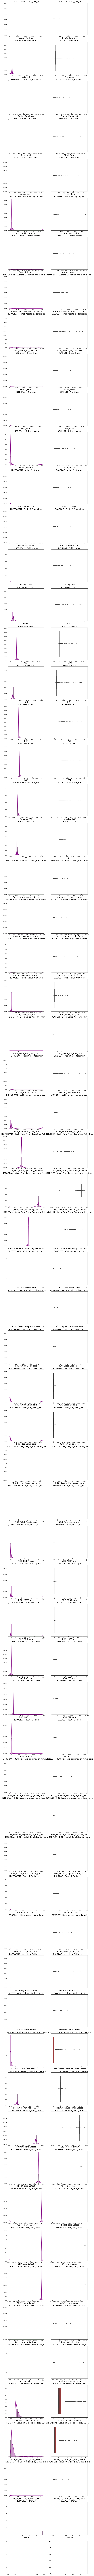

In [19]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')
col_names.remove('Networth_Next_Year')

fig, axs=plt.subplots(nrows= 66, ncols= 2, squeeze=True, figsize=(15,500))

for i, col_val in enumerate(col_names):
    
    # HISTOGRAM
    sns.distplot(df[col_val], kde=True, bins=50, hist_kws=dict(ec='black'), ax=axs[i][0], color='purple')
    axs[i][0].set_title('HISTOGRAM - {}'.format(col_val), fontsize=20)
    axs[i][0].set_xlabel(col_val, fontsize=20)
    
    # BOXPLOT
    sns.boxplot(df[col_val], ax=axs[i][1], color='brown')
    axs[i][1].set_title('BOXPLOT - {}'.format(col_val), fontsize=20)
    axs[i][1].set_xlabel(col_val, fontsize=20)
    
plt.show()



### It is observed that all the variables have Ouliers. Also, from Histogram it is seen that all the variables are highly skewed, right or left. 

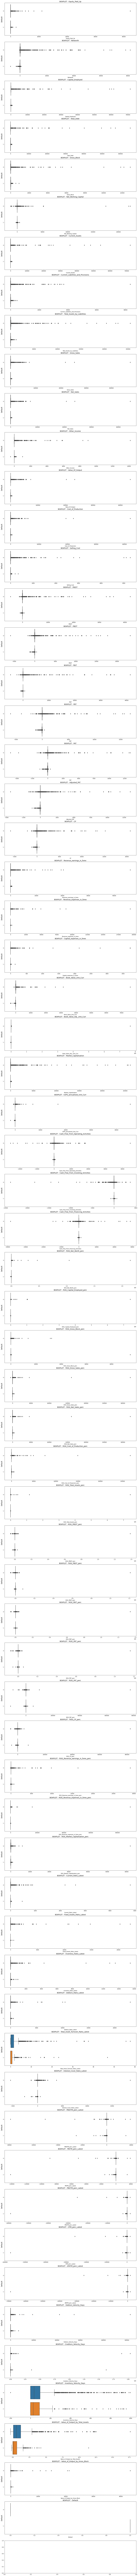

In [20]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')
col_names.remove('Networth_Next_Year')

fig, ax = plt.subplots(nrows= 66, figsize=(20,400))
i = 0
for i, col_val in enumerate(col_names):
    
    # BOXPLOT
    
    sns.boxplot(x = df[col_val], y = df["Default"] , ax=ax[i], orient='h')

    ax[i].set_title('BOXPLOT - {}'.format(col_val), fontsize=14)
    ax[i].set_ylabel("Default", fontsize=14)


plt.show()

## Bivariate analysis

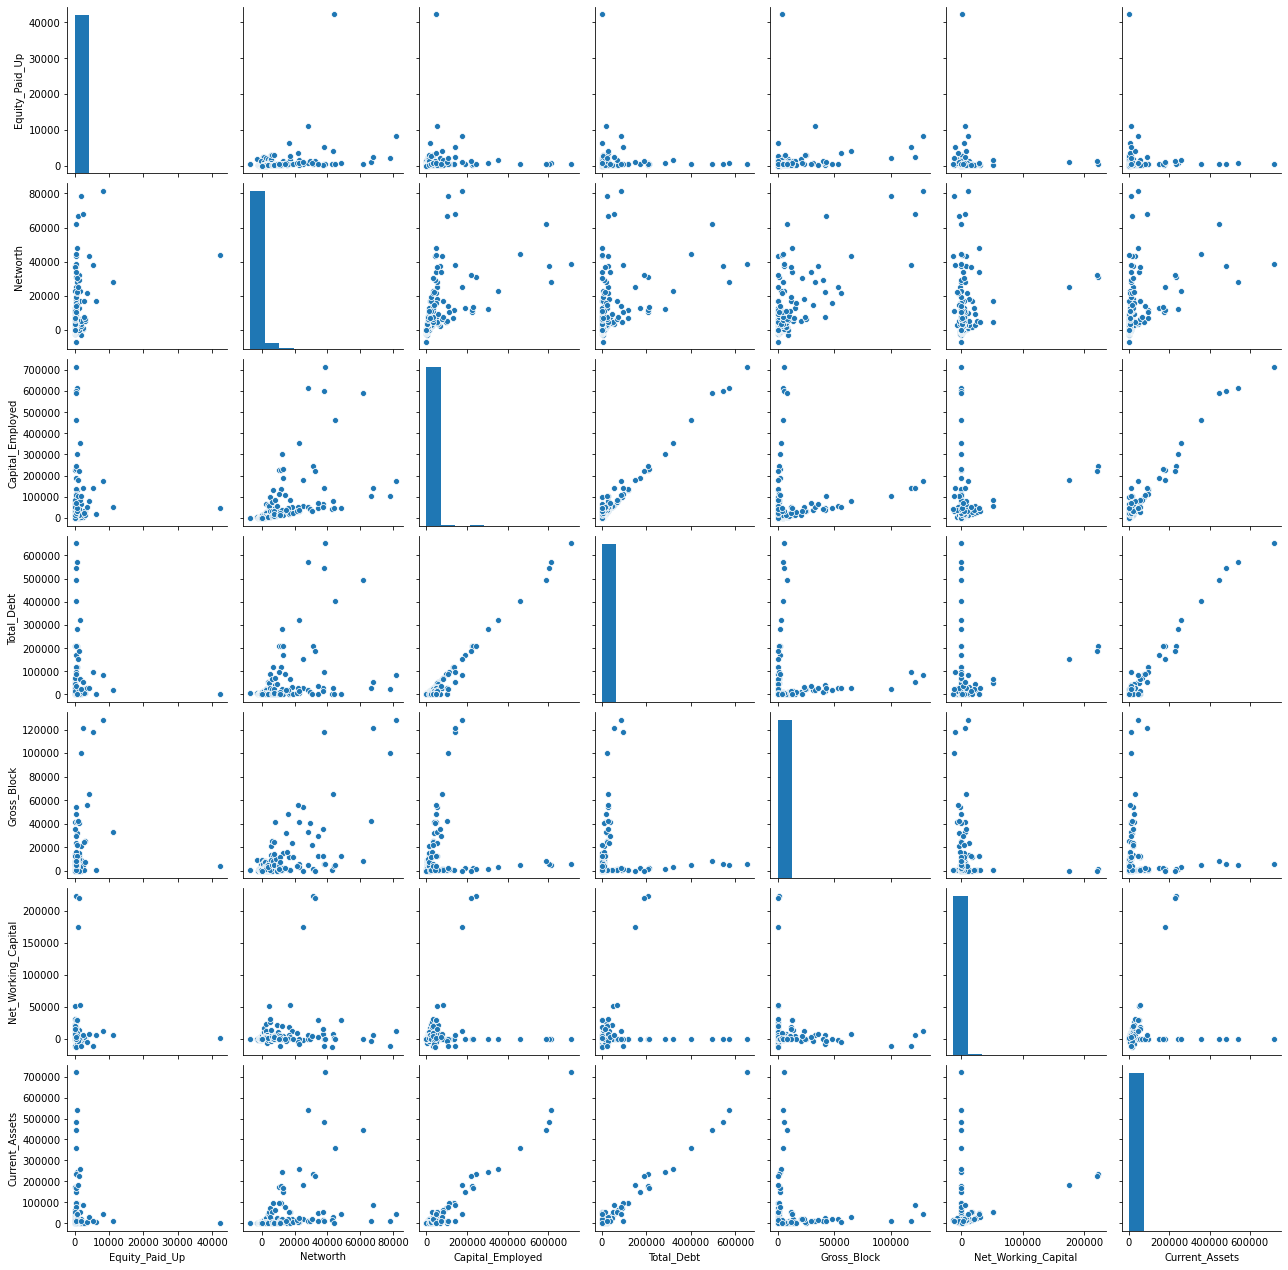

In [21]:
from IPython.display import Image
col=['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets']
sns_plot = sns.pairplot(df[col])
#sns_plot.savefig("pairplot.png")

#plt.clf() # Clean parirplot figure from sns 
#Image(filename='pairplot.png') # Show pairplot as image

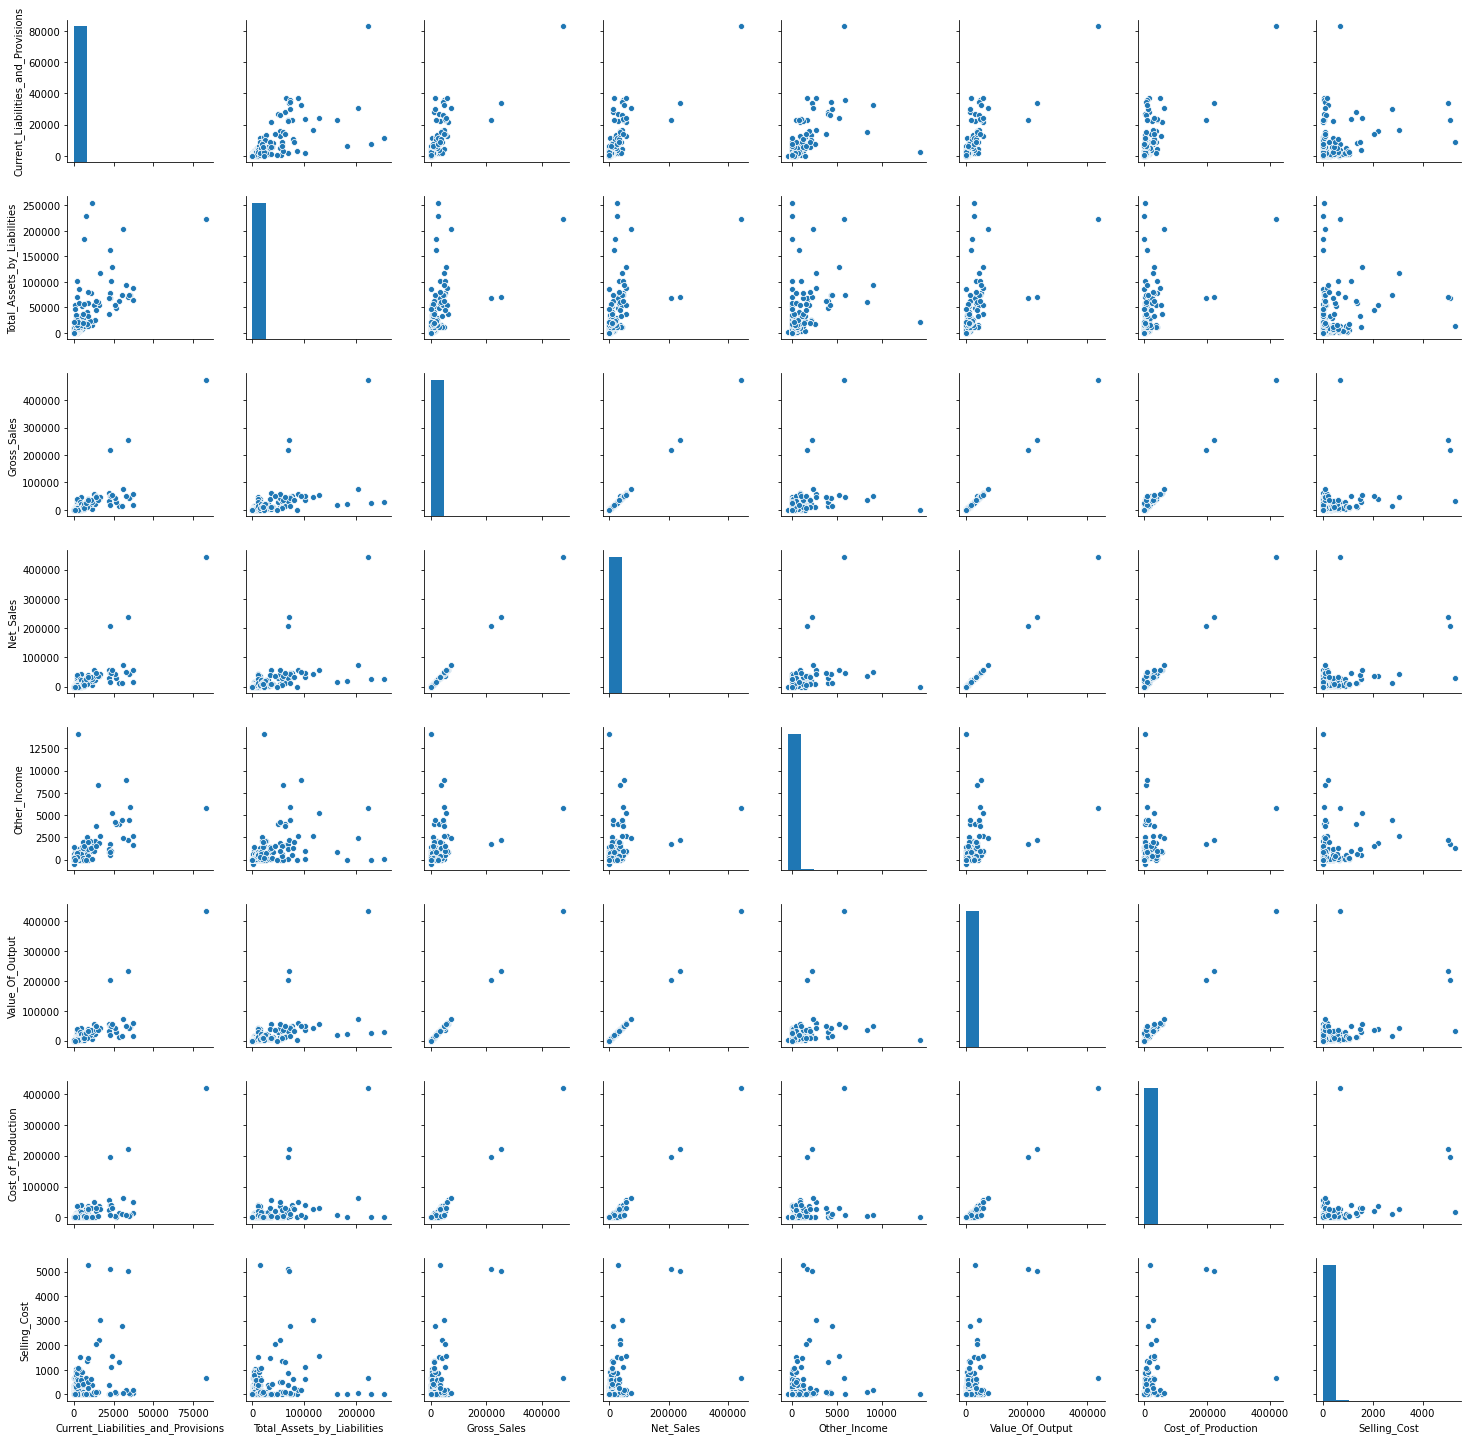

In [22]:
from IPython.display import Image
col=[  'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost']
sns_plot = sns.pairplot(df[col])

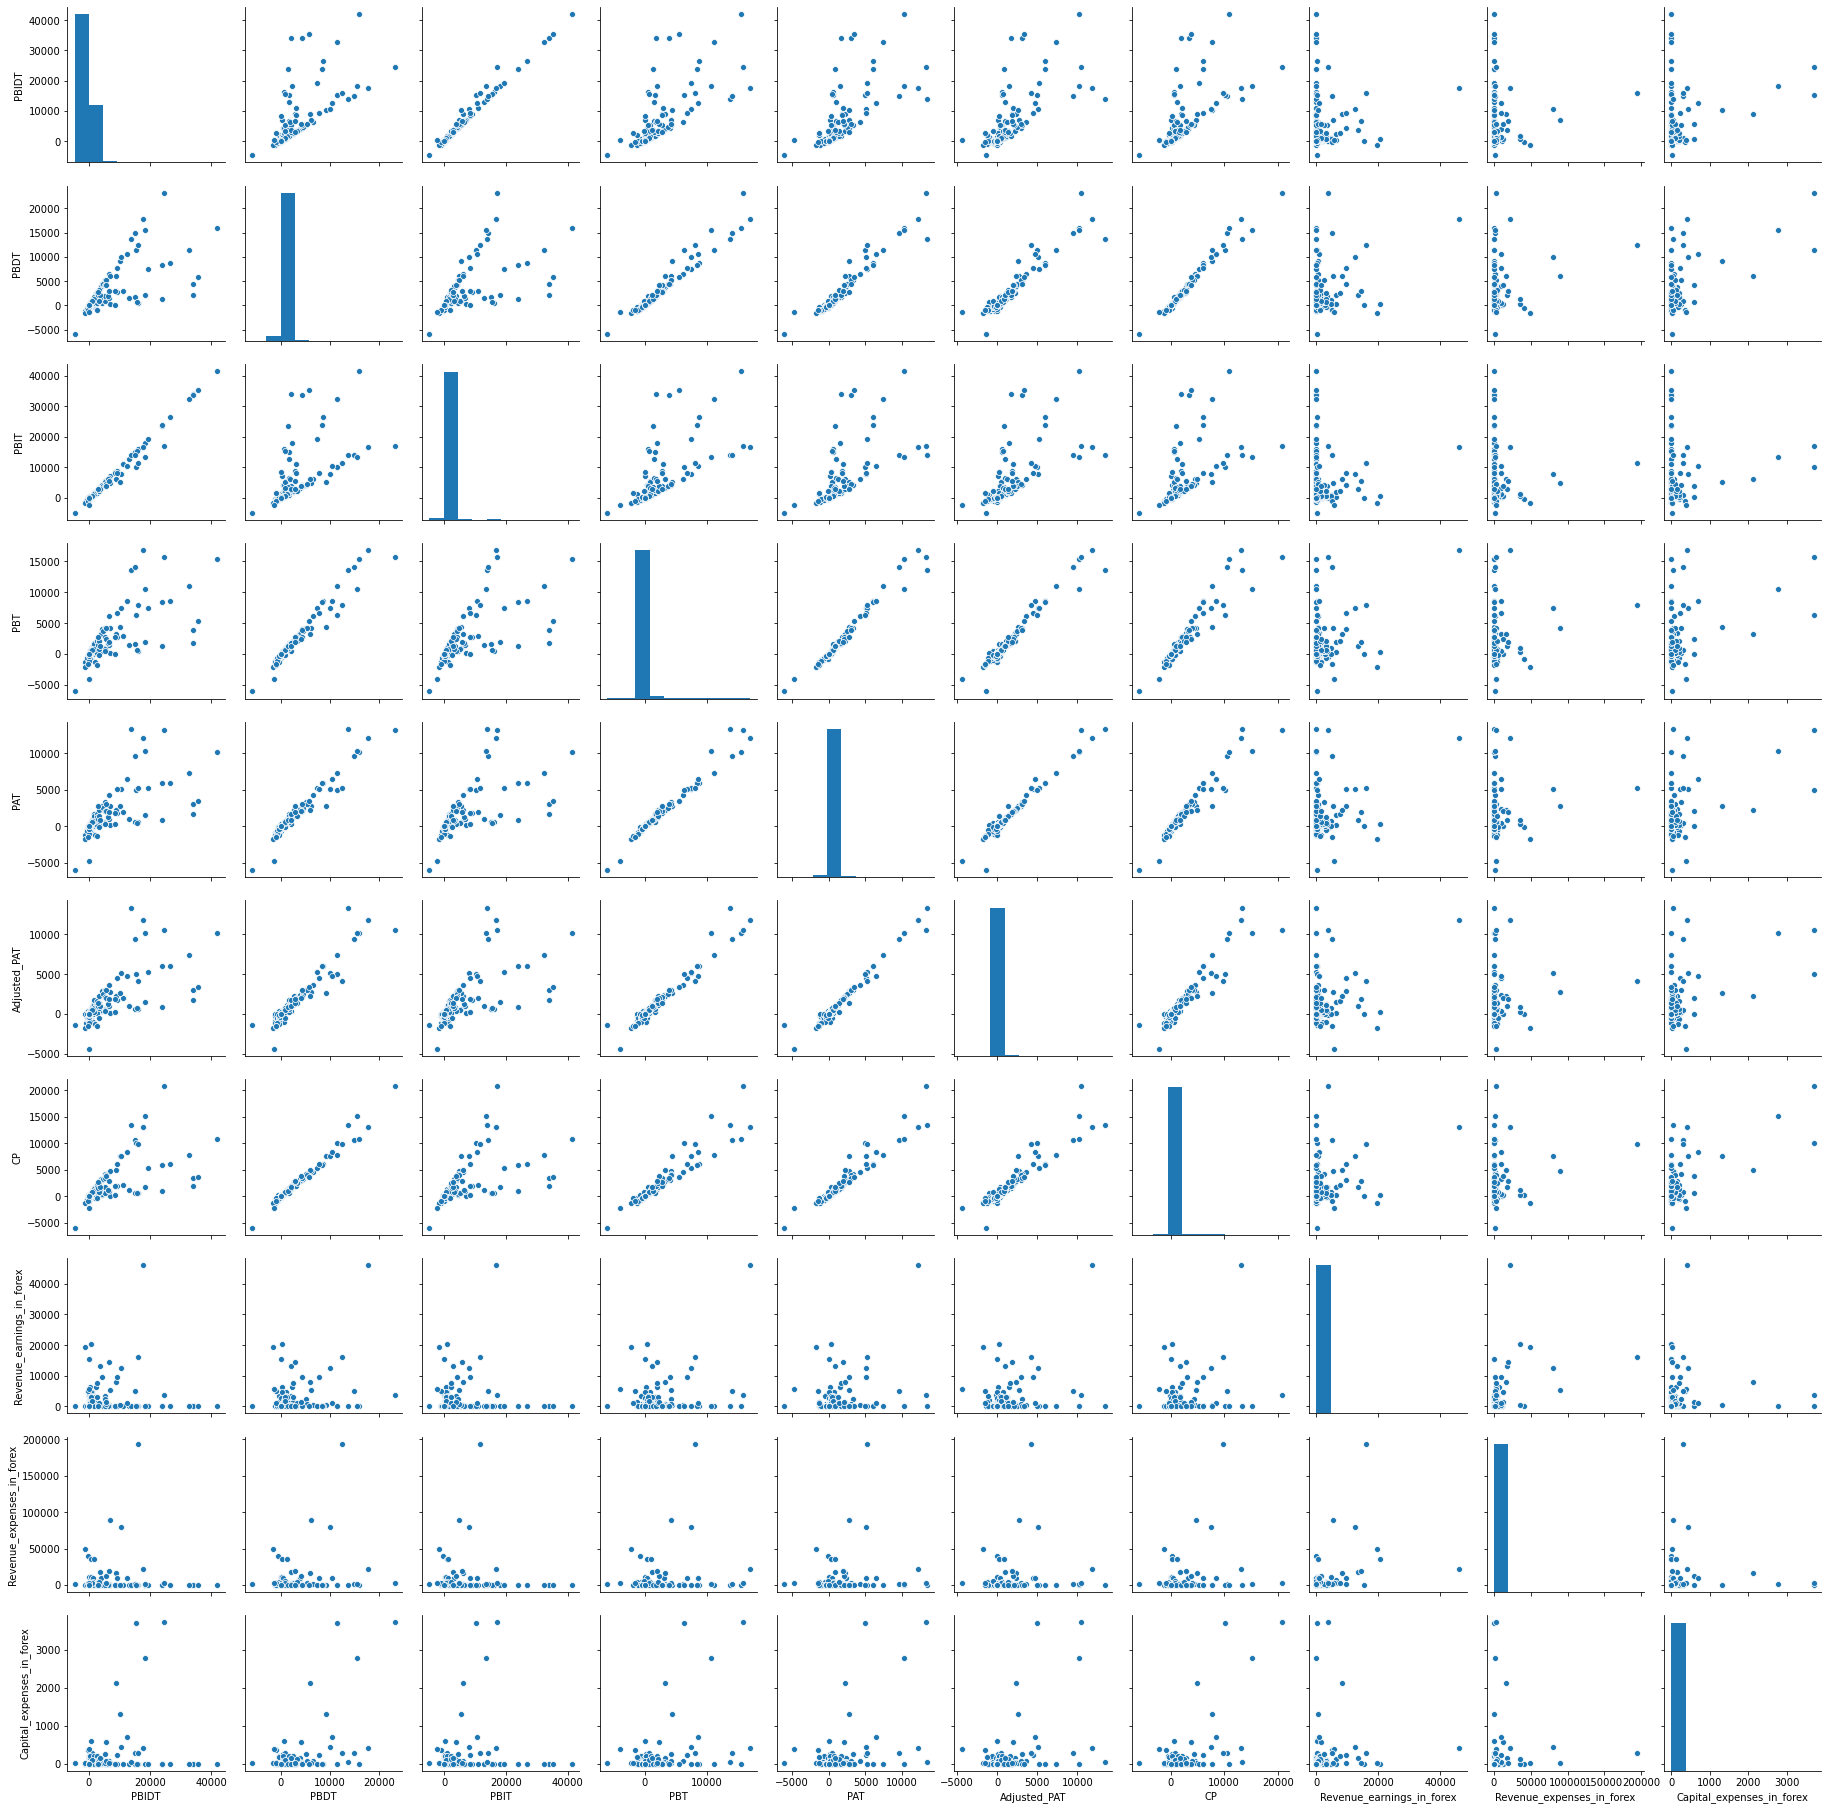

In [23]:
from IPython.display import Image
col=[  'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex']
sns_plot = sns.pairplot(df[col])

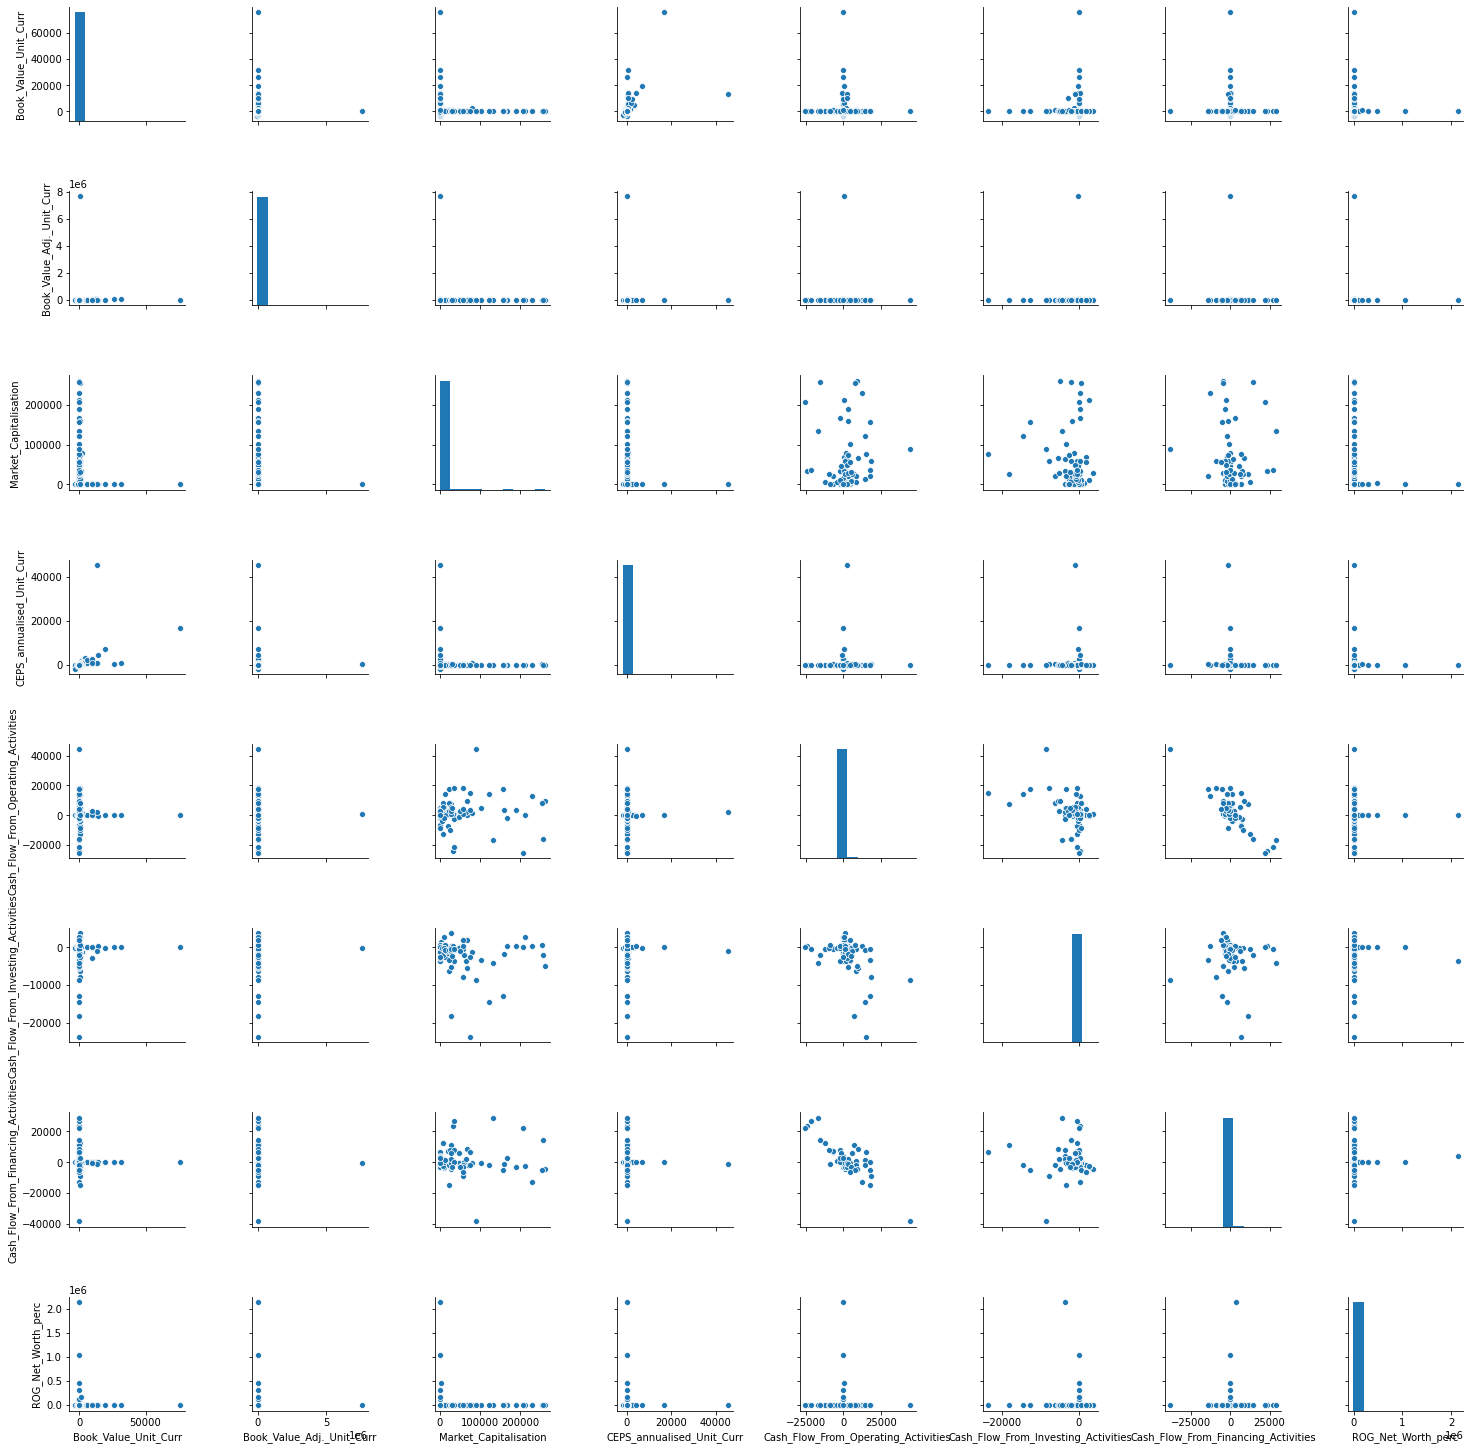

In [24]:
from IPython.display import Image
col=[  'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc']
sns_plot = sns.pairplot(df[col])

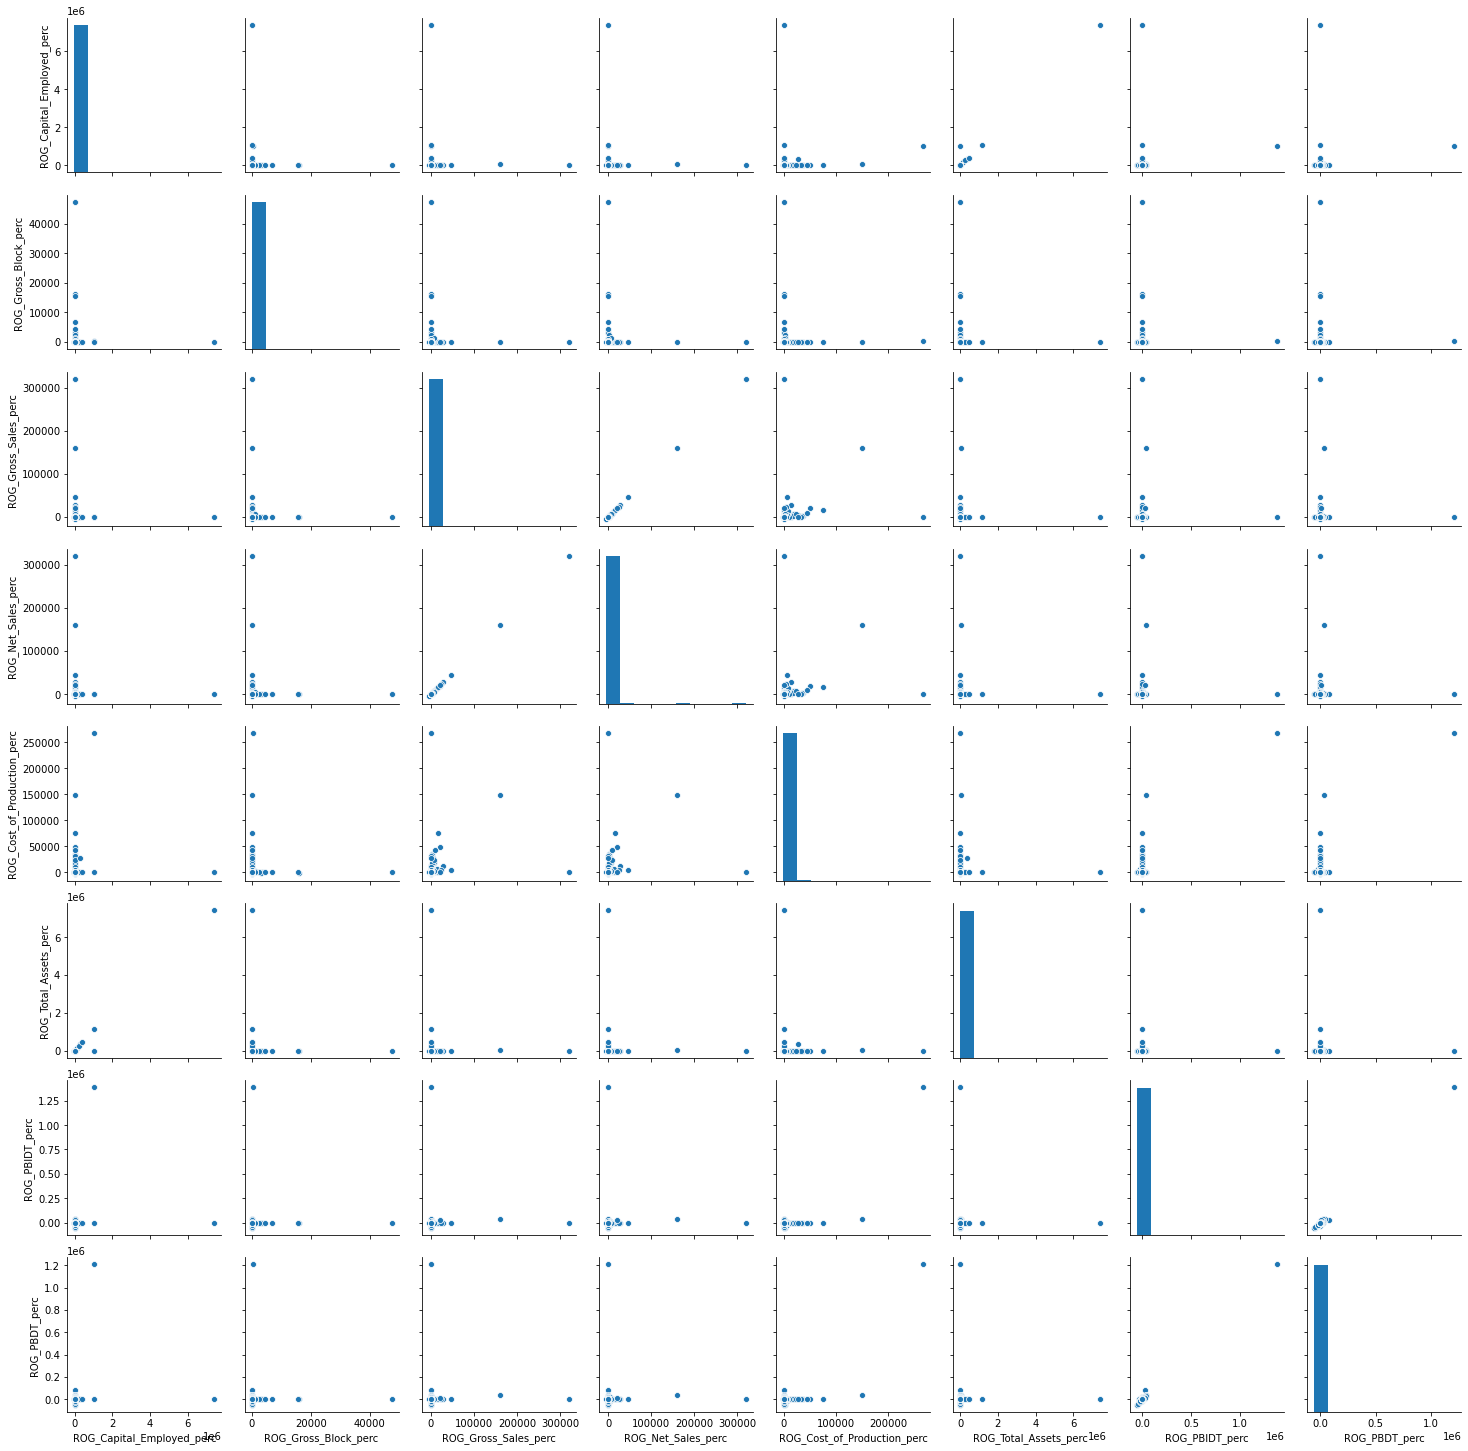

In [25]:
from IPython.display import Image
col=[  'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc']
sns_plot = sns.pairplot(df[col])

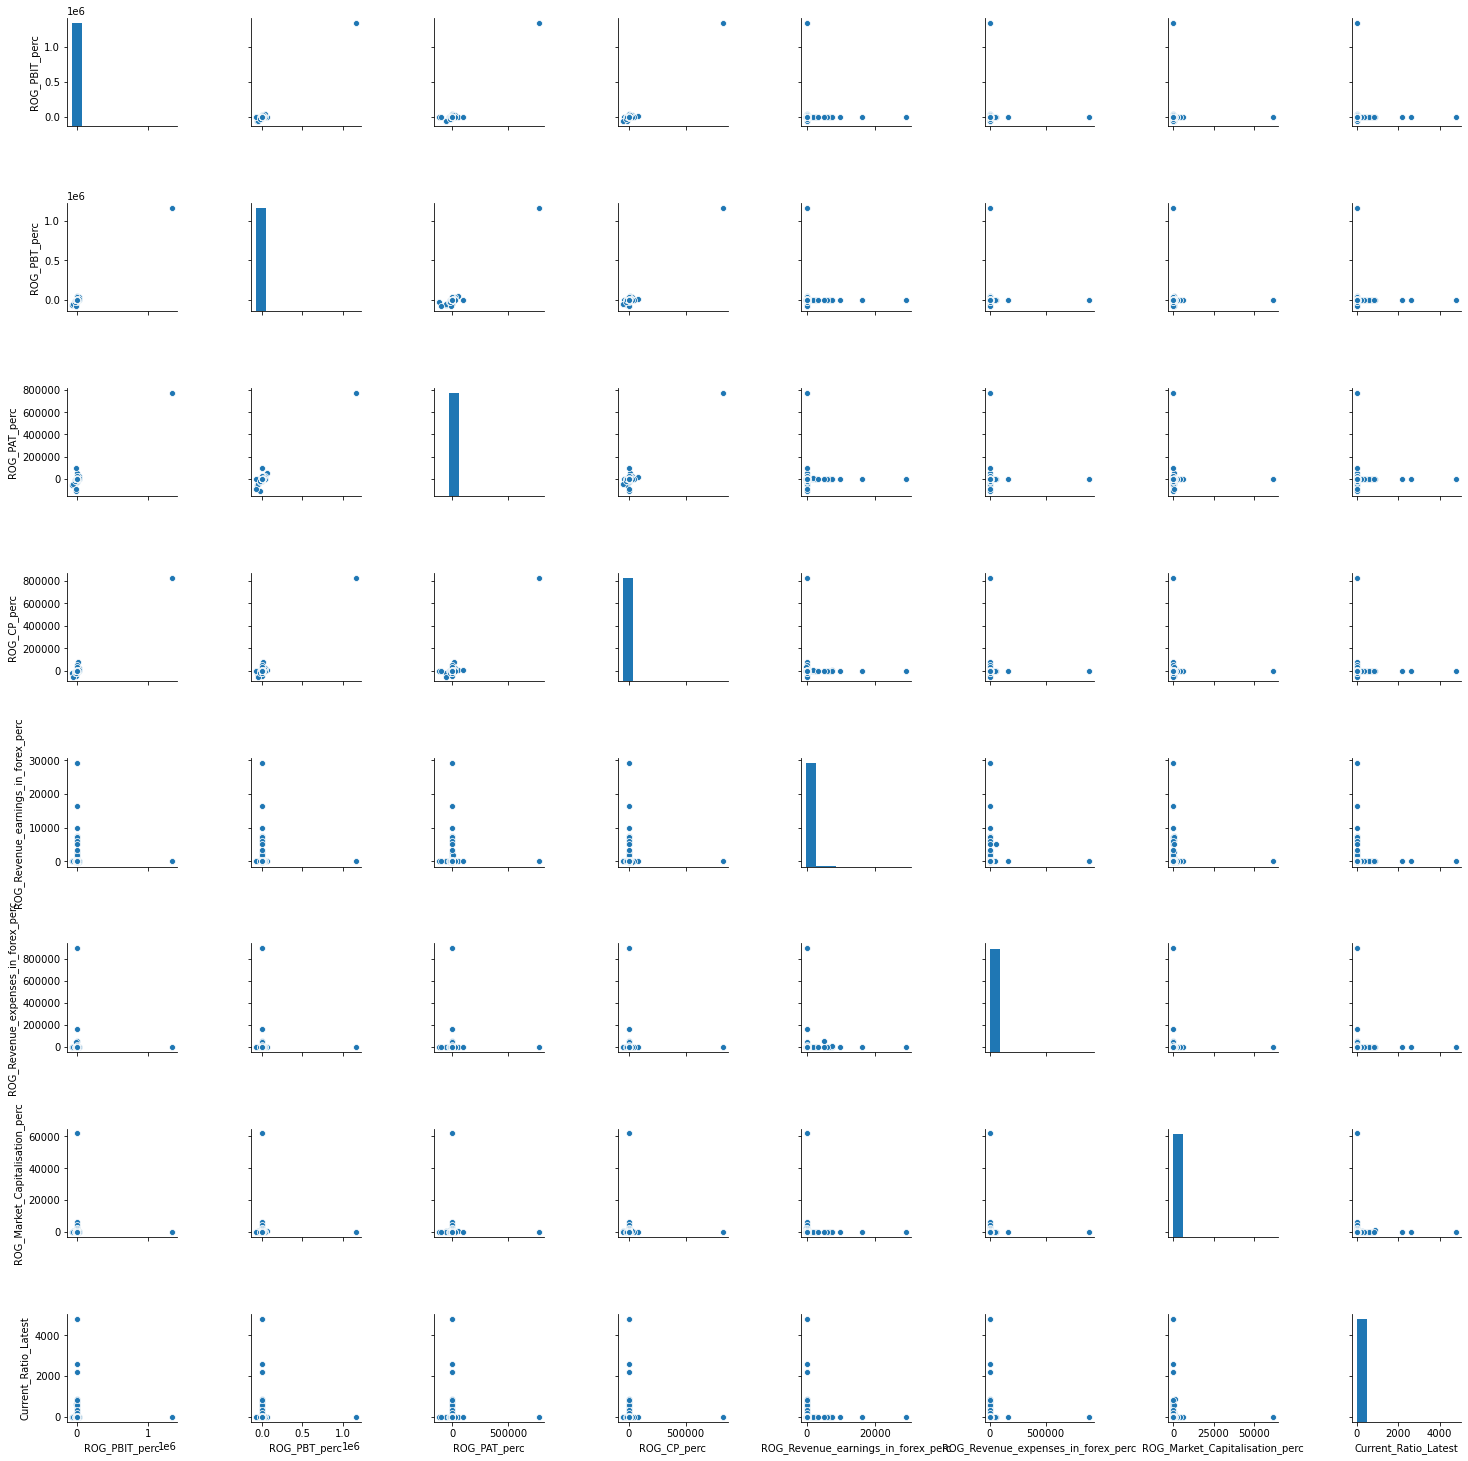

In [26]:
from IPython.display import Image
col=[  'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest']
sns_plot = sns.pairplot(df[col])

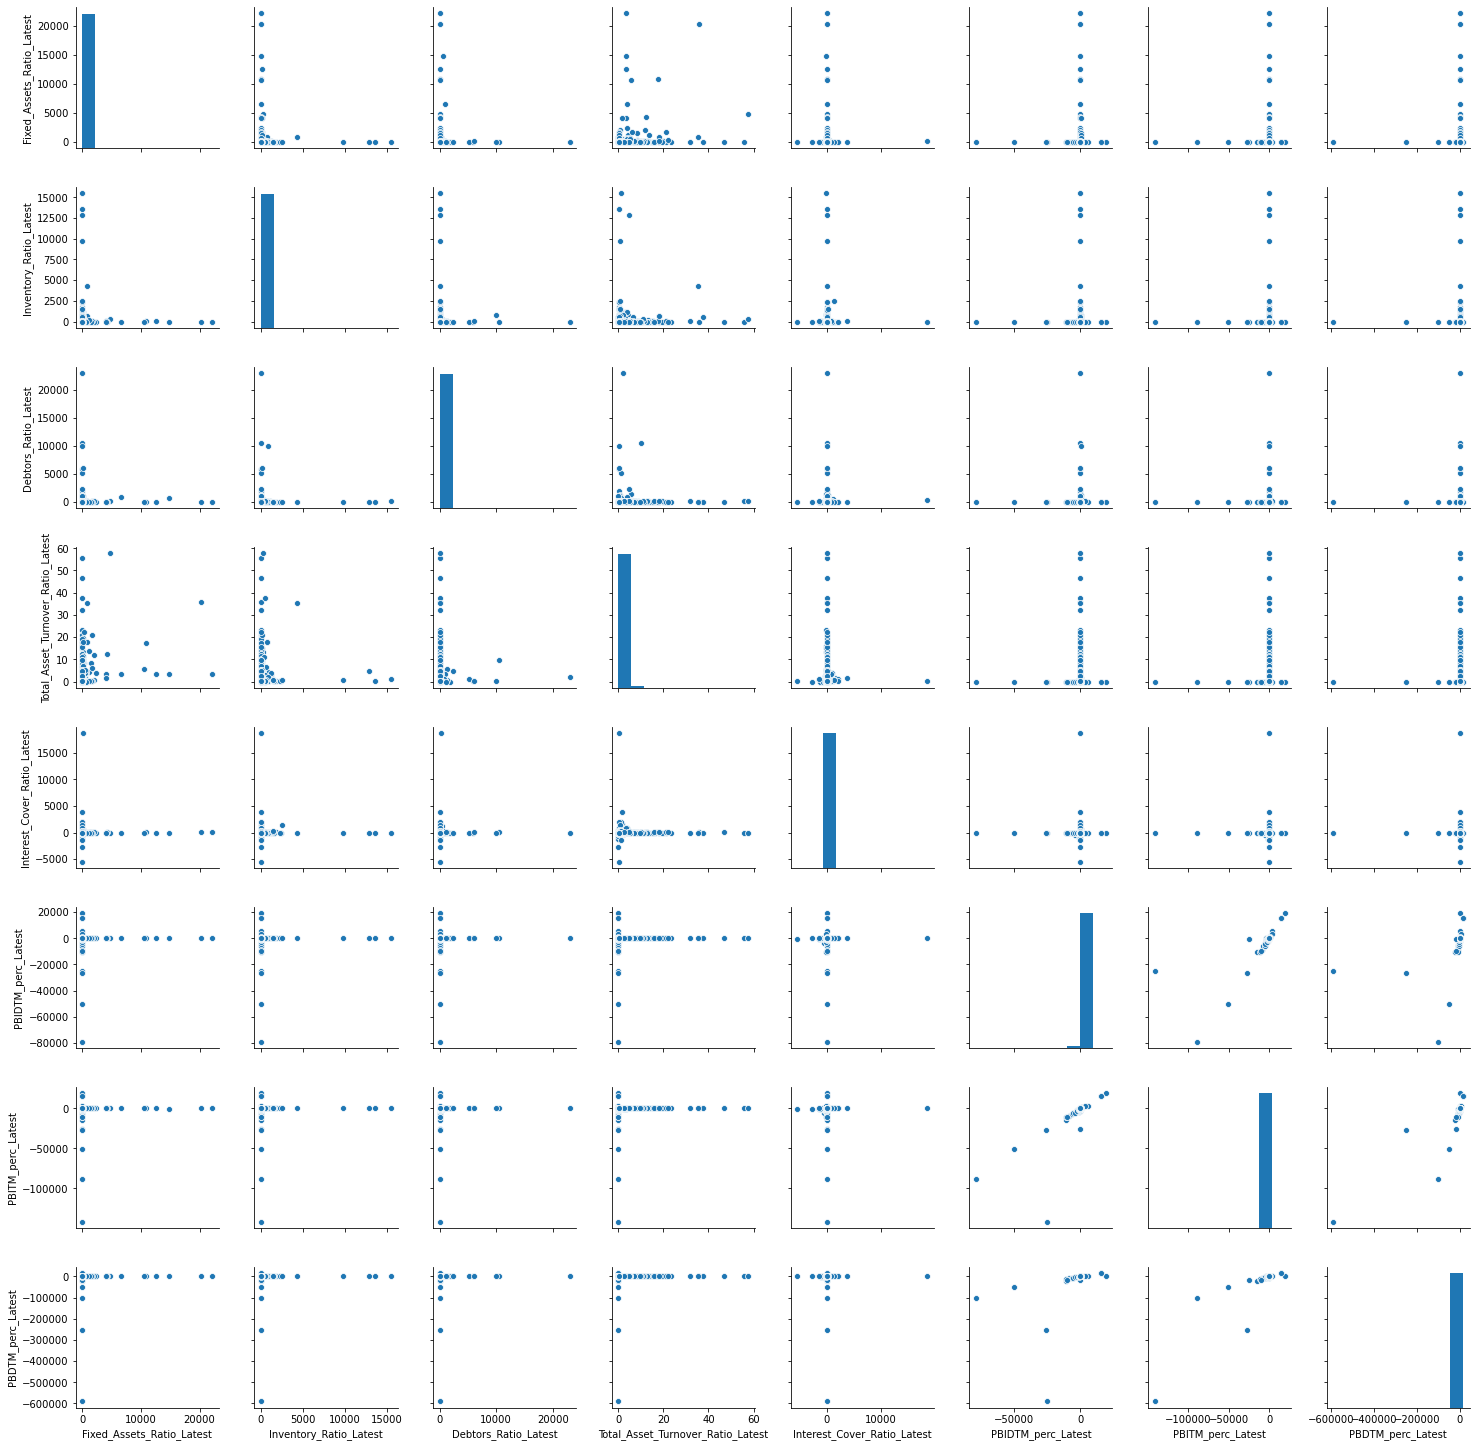

In [27]:
from IPython.display import Image
col=[  'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
       'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest']
sns_plot = sns.pairplot(df[col])

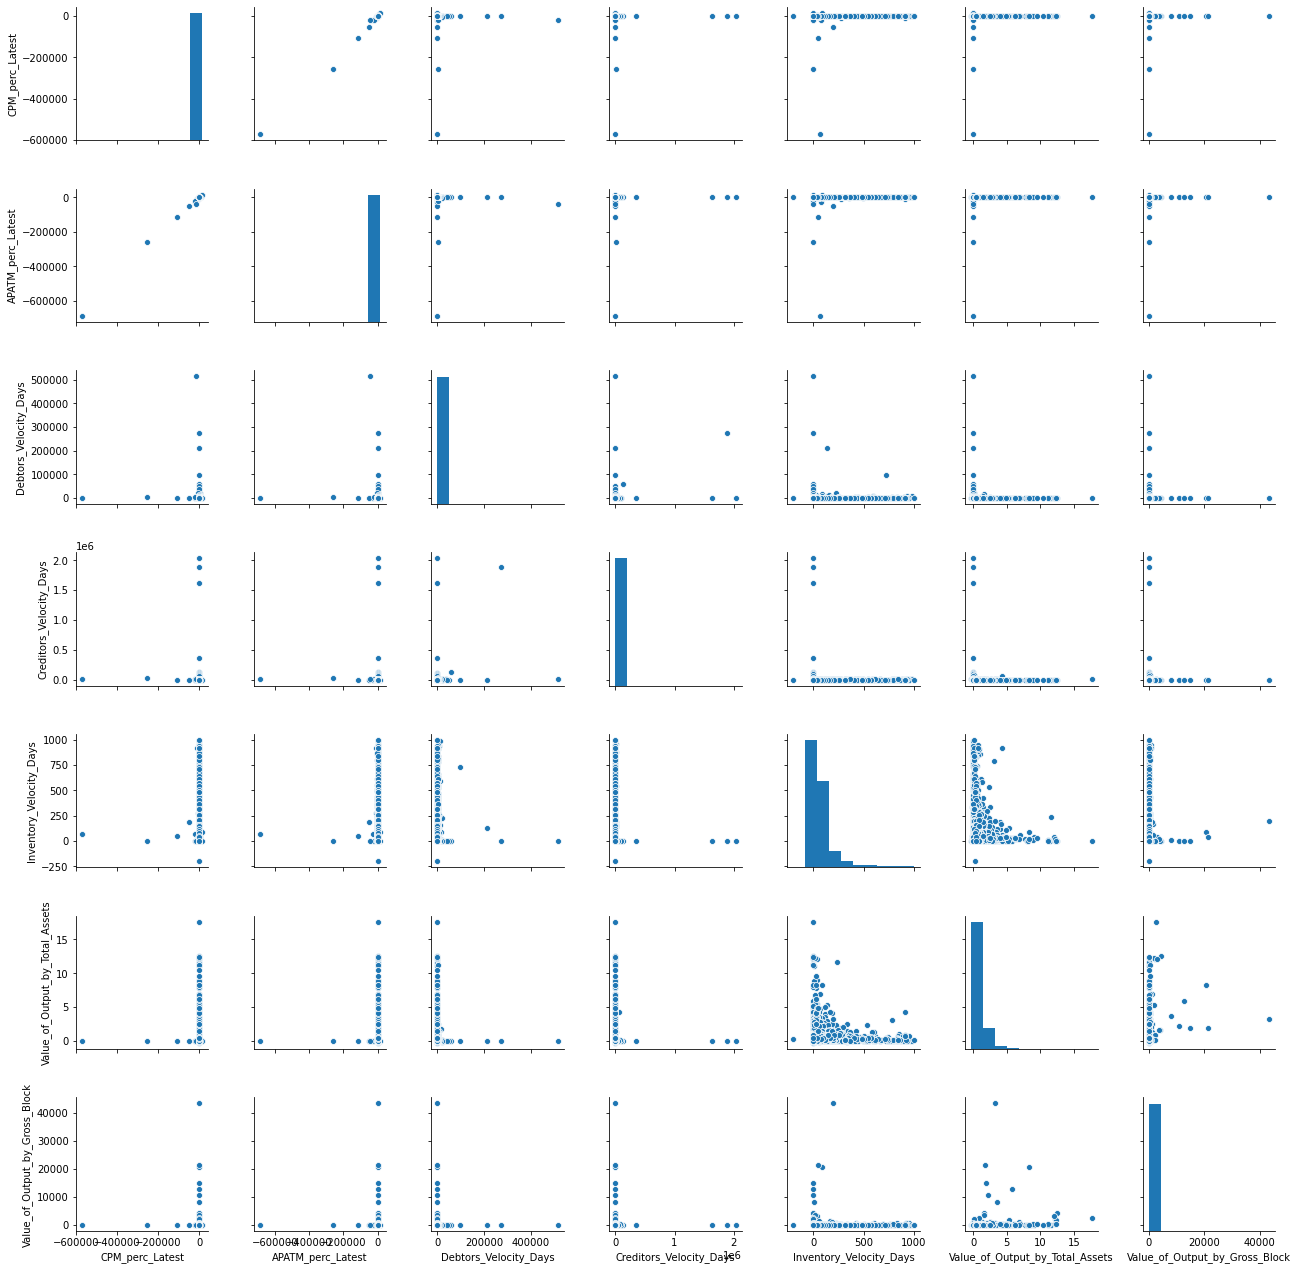

In [28]:
from IPython.display import Image
col=[  'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']
sns_plot = sns.pairplot(df[col])

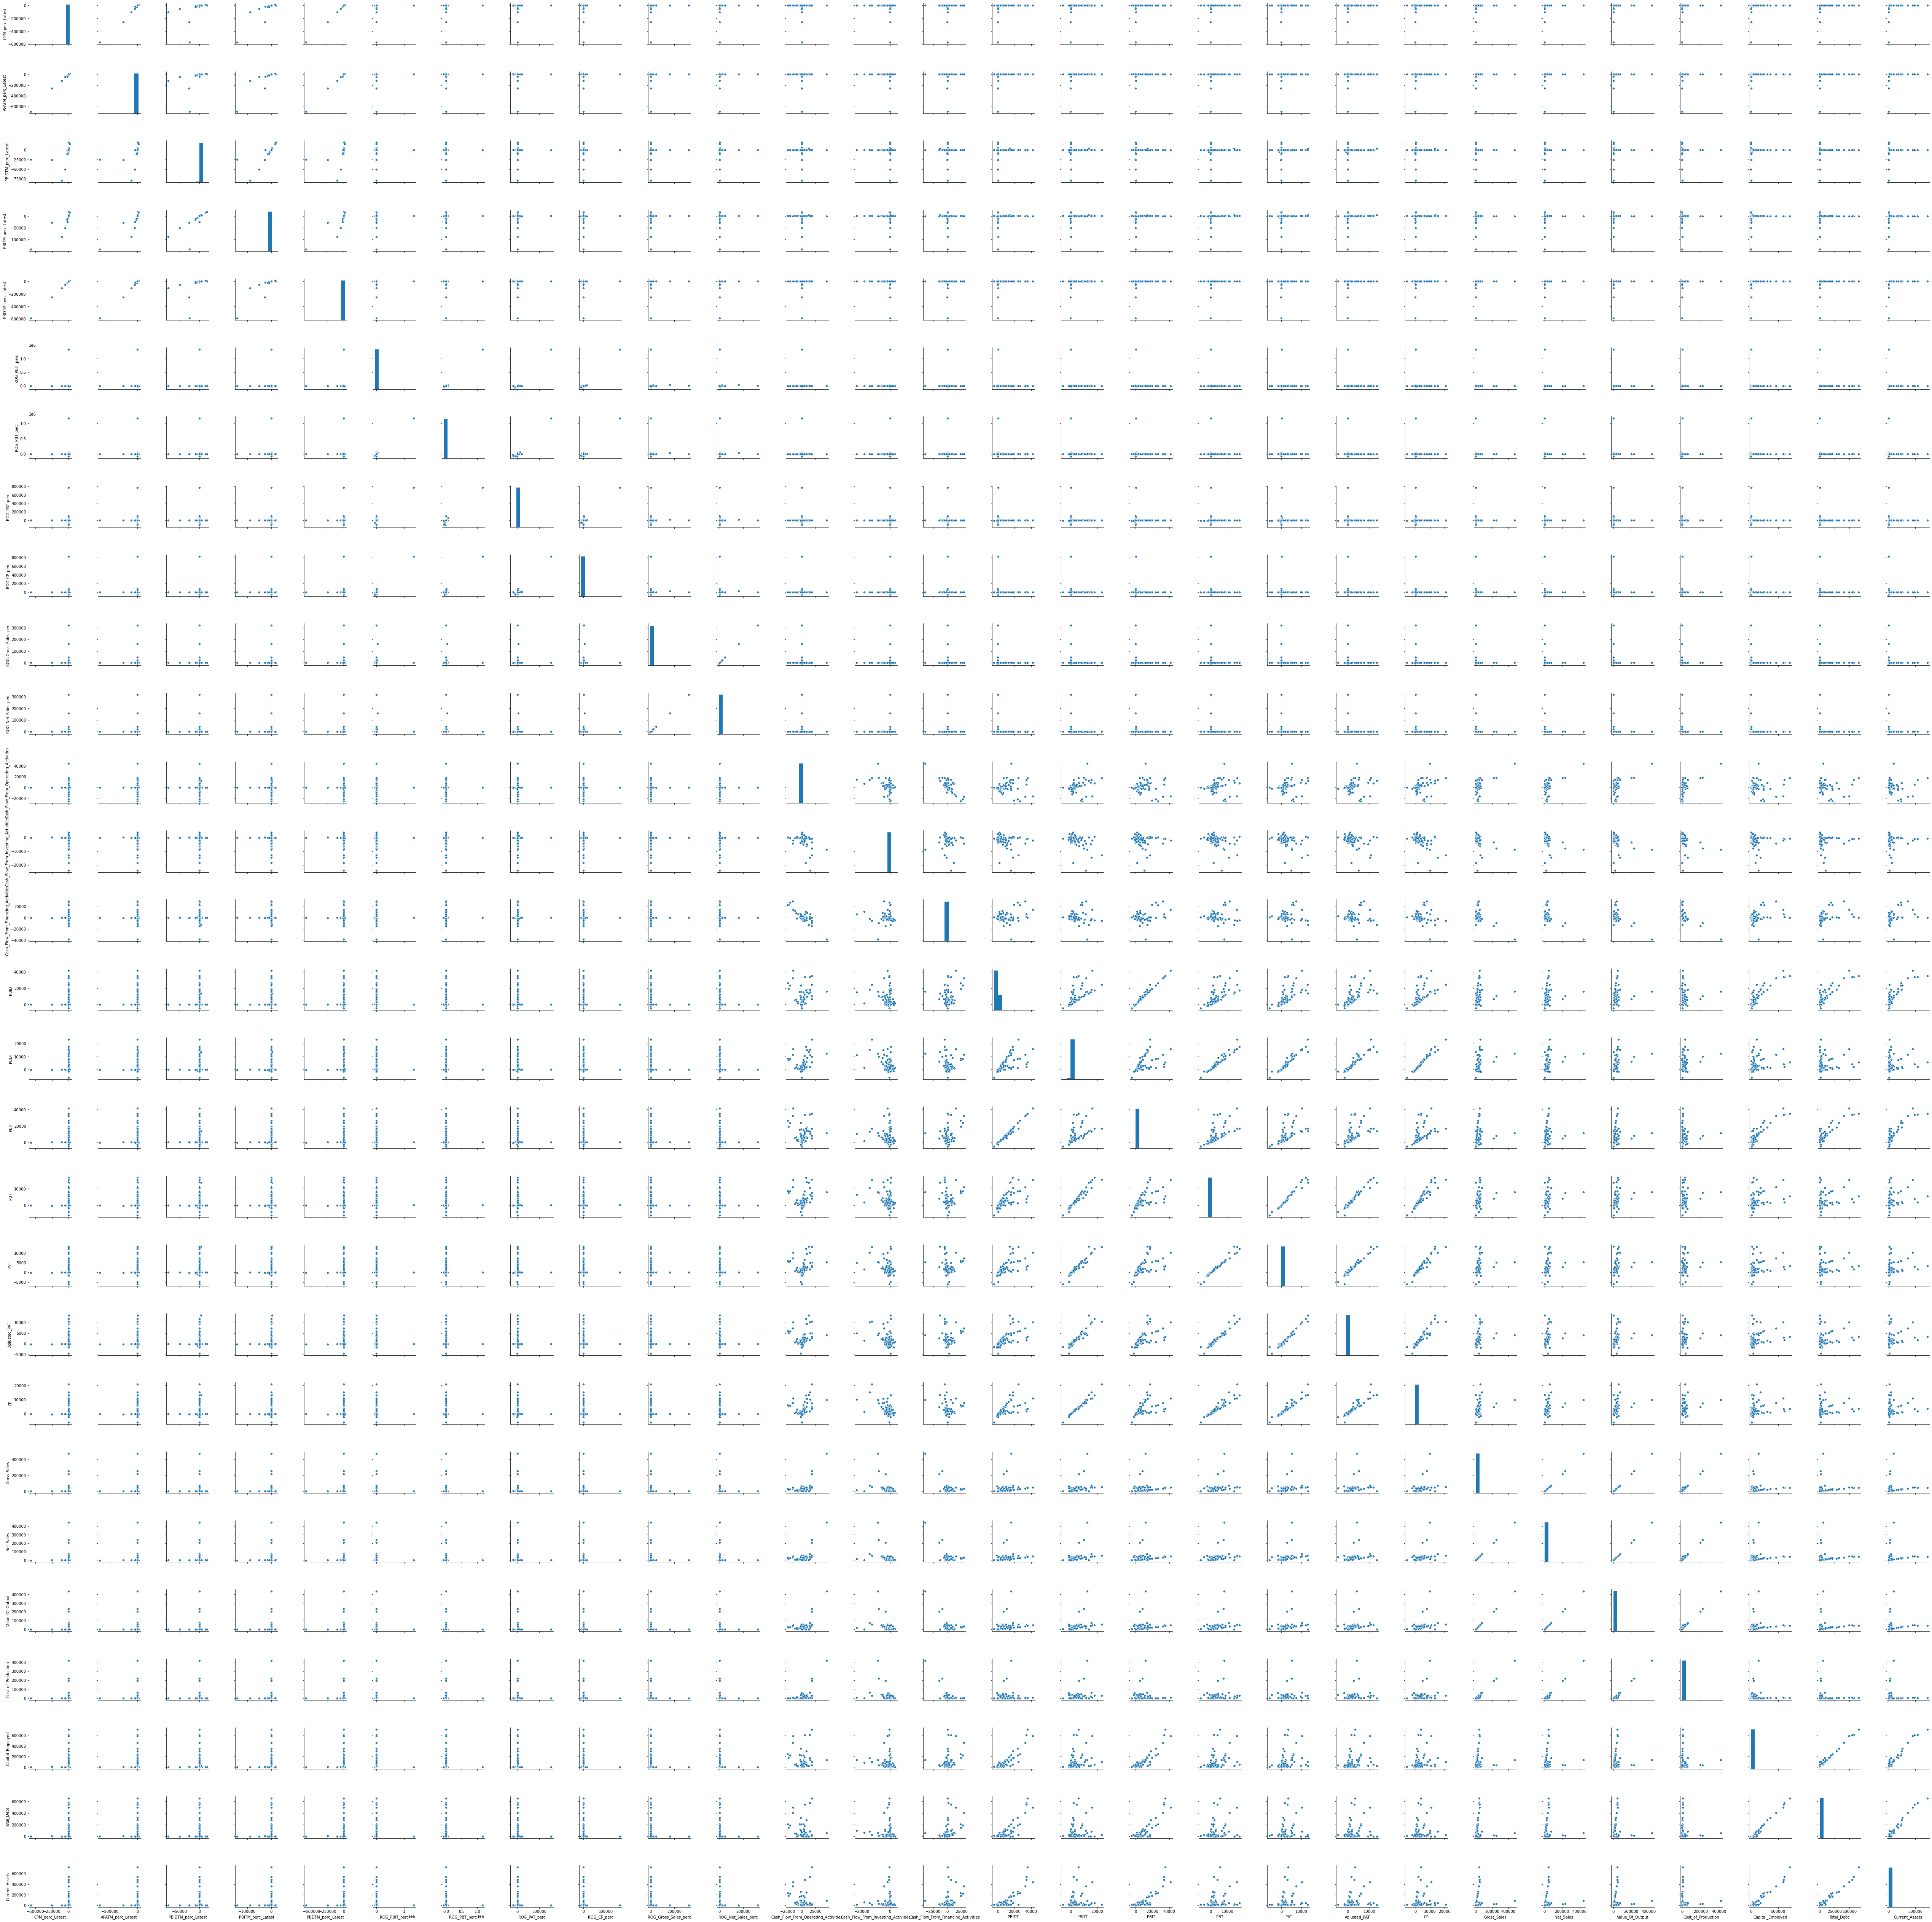

In [29]:
# The HIGH Correlation variables...................

from IPython.display import Image
col= ['CPM_perc_Latest', 'APATM_perc_Latest','PBIDTM_perc_Latest','PBITM_perc_Latest', 'PBDTM_perc_Latest',
'ROG_PBIT_perc', 'ROG_PBT_perc','ROG_PAT_perc', 'ROG_CP_perc',
'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities','PBIDT', 'PBDT', 'PBIT', 'PBT',
'PAT', 'Adjusted_PAT', 'CP', 'Gross_Sales', 'Net_Sales', 'Value_Of_Output',
'Cost_of_Production', 'Capital_Employed','Total_Debt', 'Current_Assets']

sns_plot = sns.pairplot(df[col])


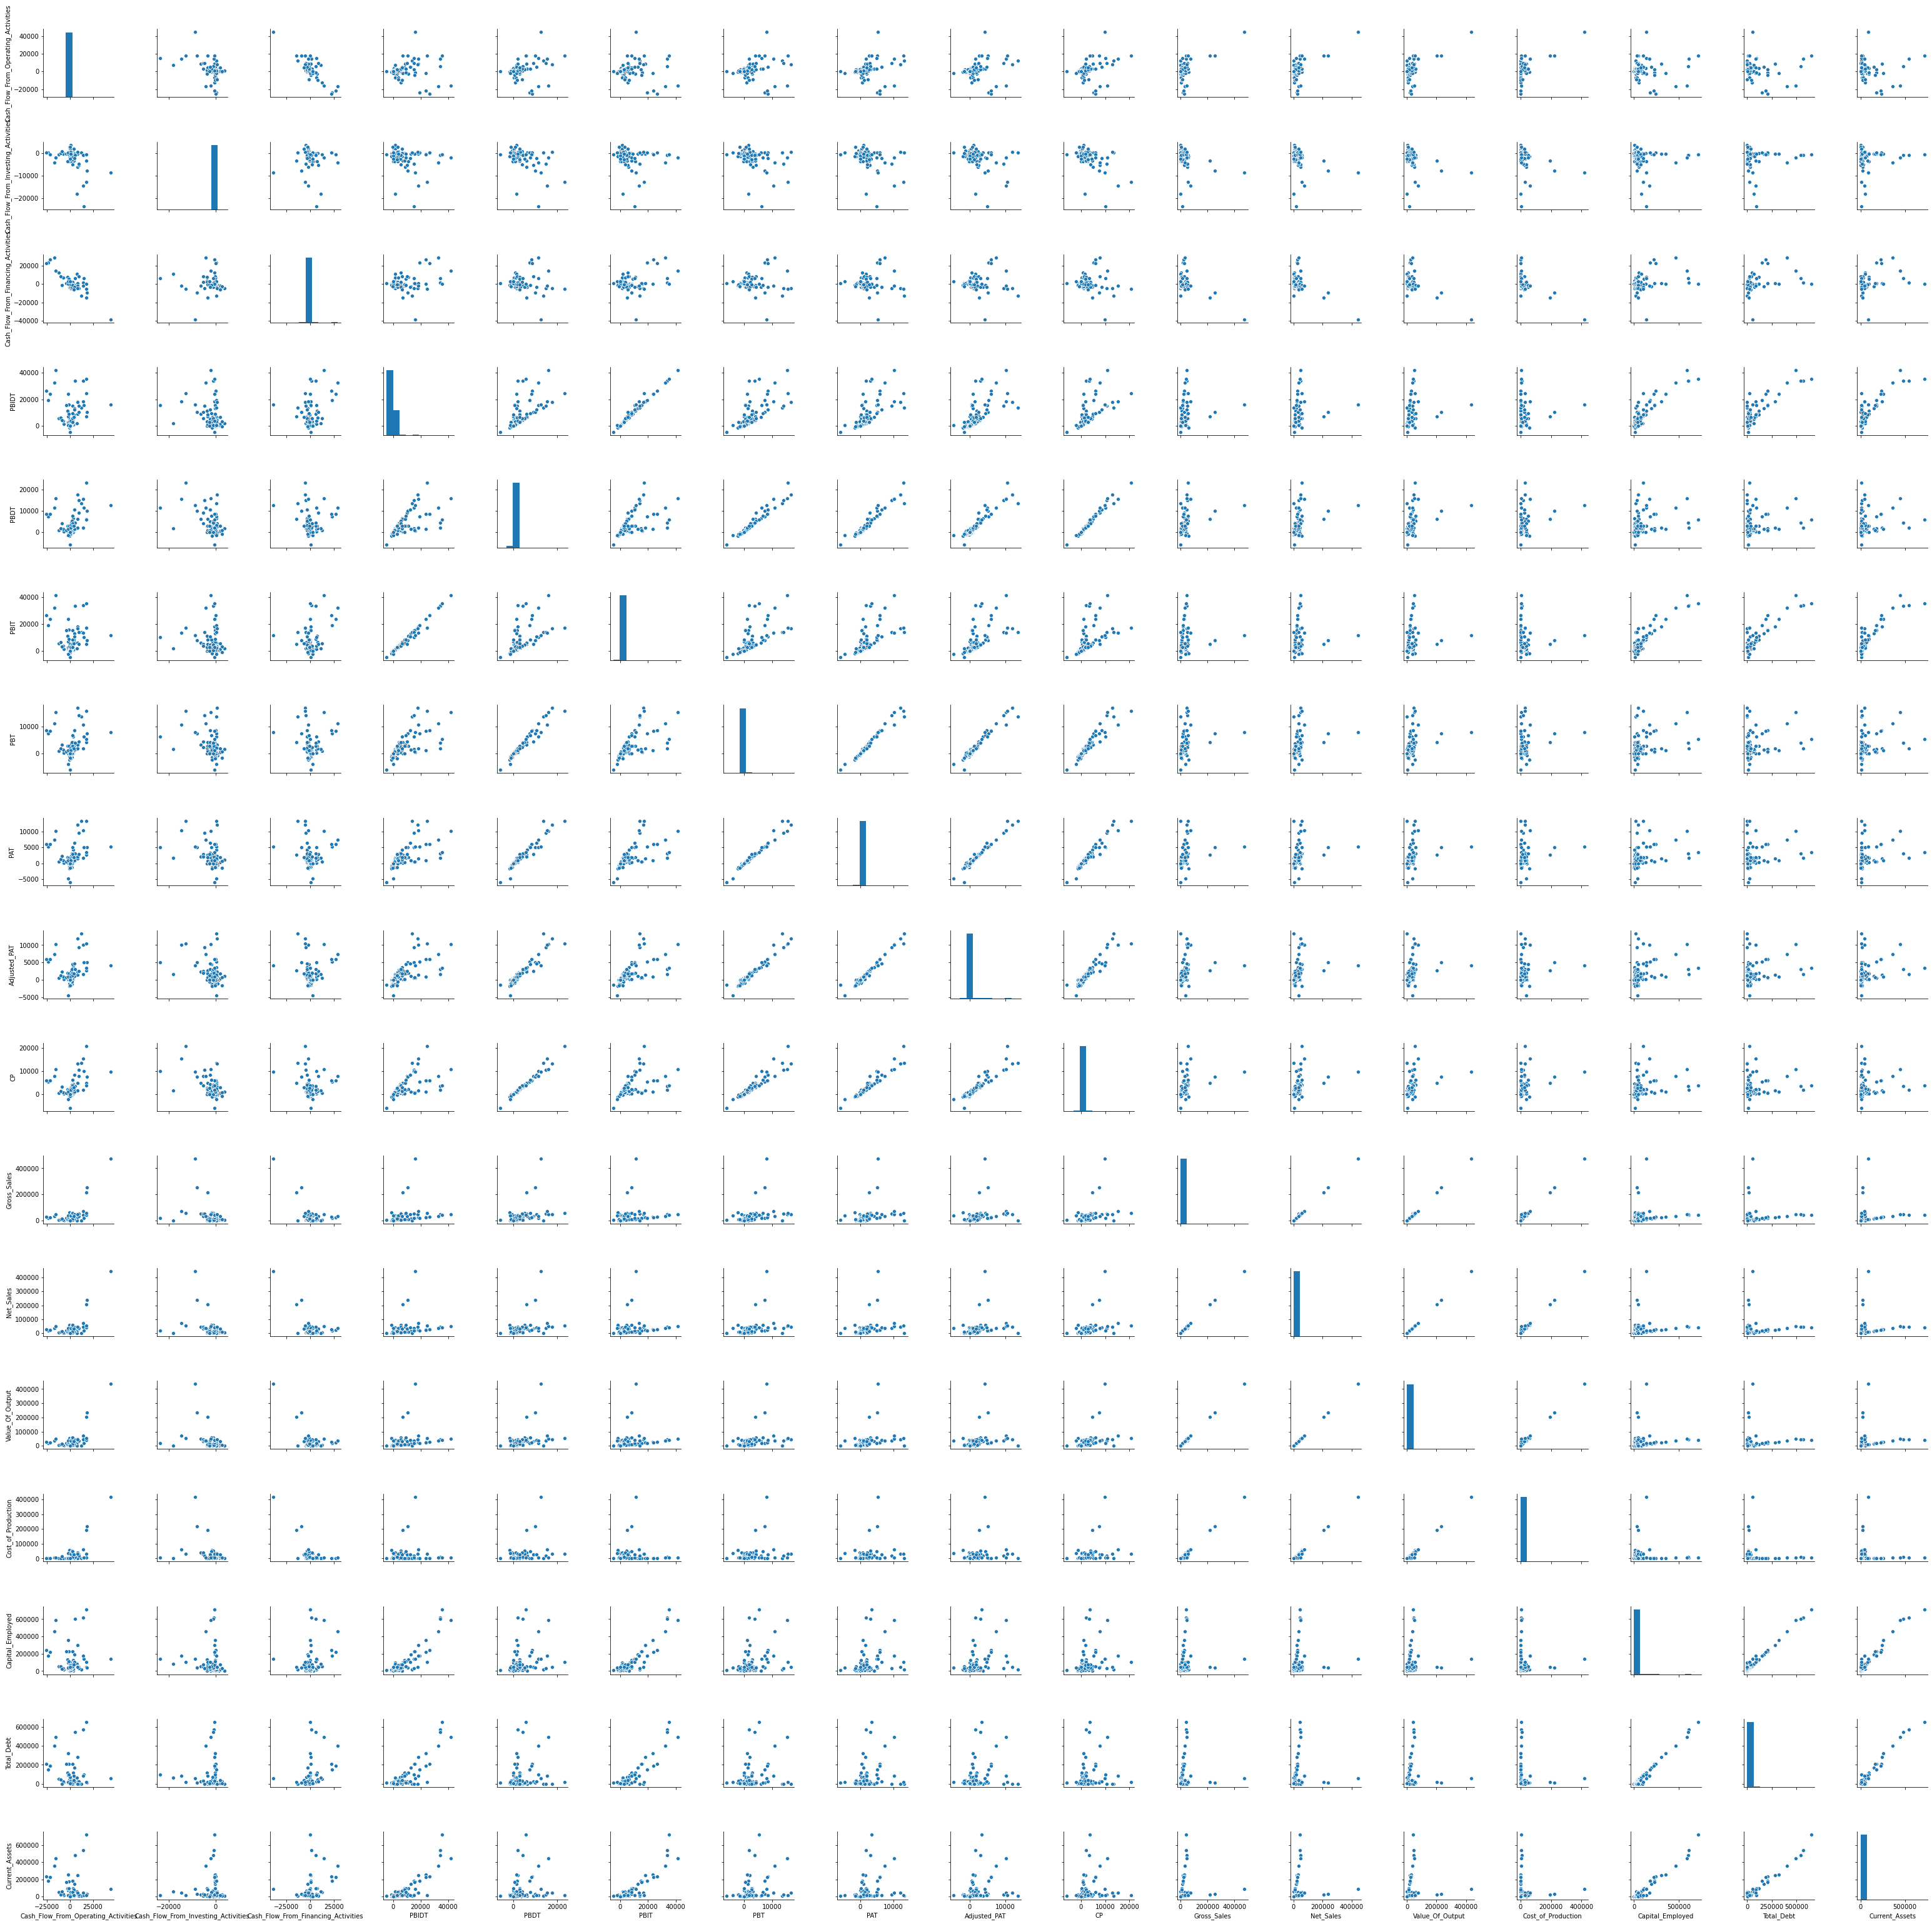

In [30]:
from IPython.display import Image
col= ['Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities','PBIDT', 'PBDT', 'PBIT', 'PBT',
'PAT', 'Adjusted_PAT', 'CP', 'Gross_Sales', 'Net_Sales', 'Value_Of_Output',
'Cost_of_Production', 'Capital_Employed','Total_Debt', 'Current_Assets']

sns_plot = sns.pairplot(df[col])

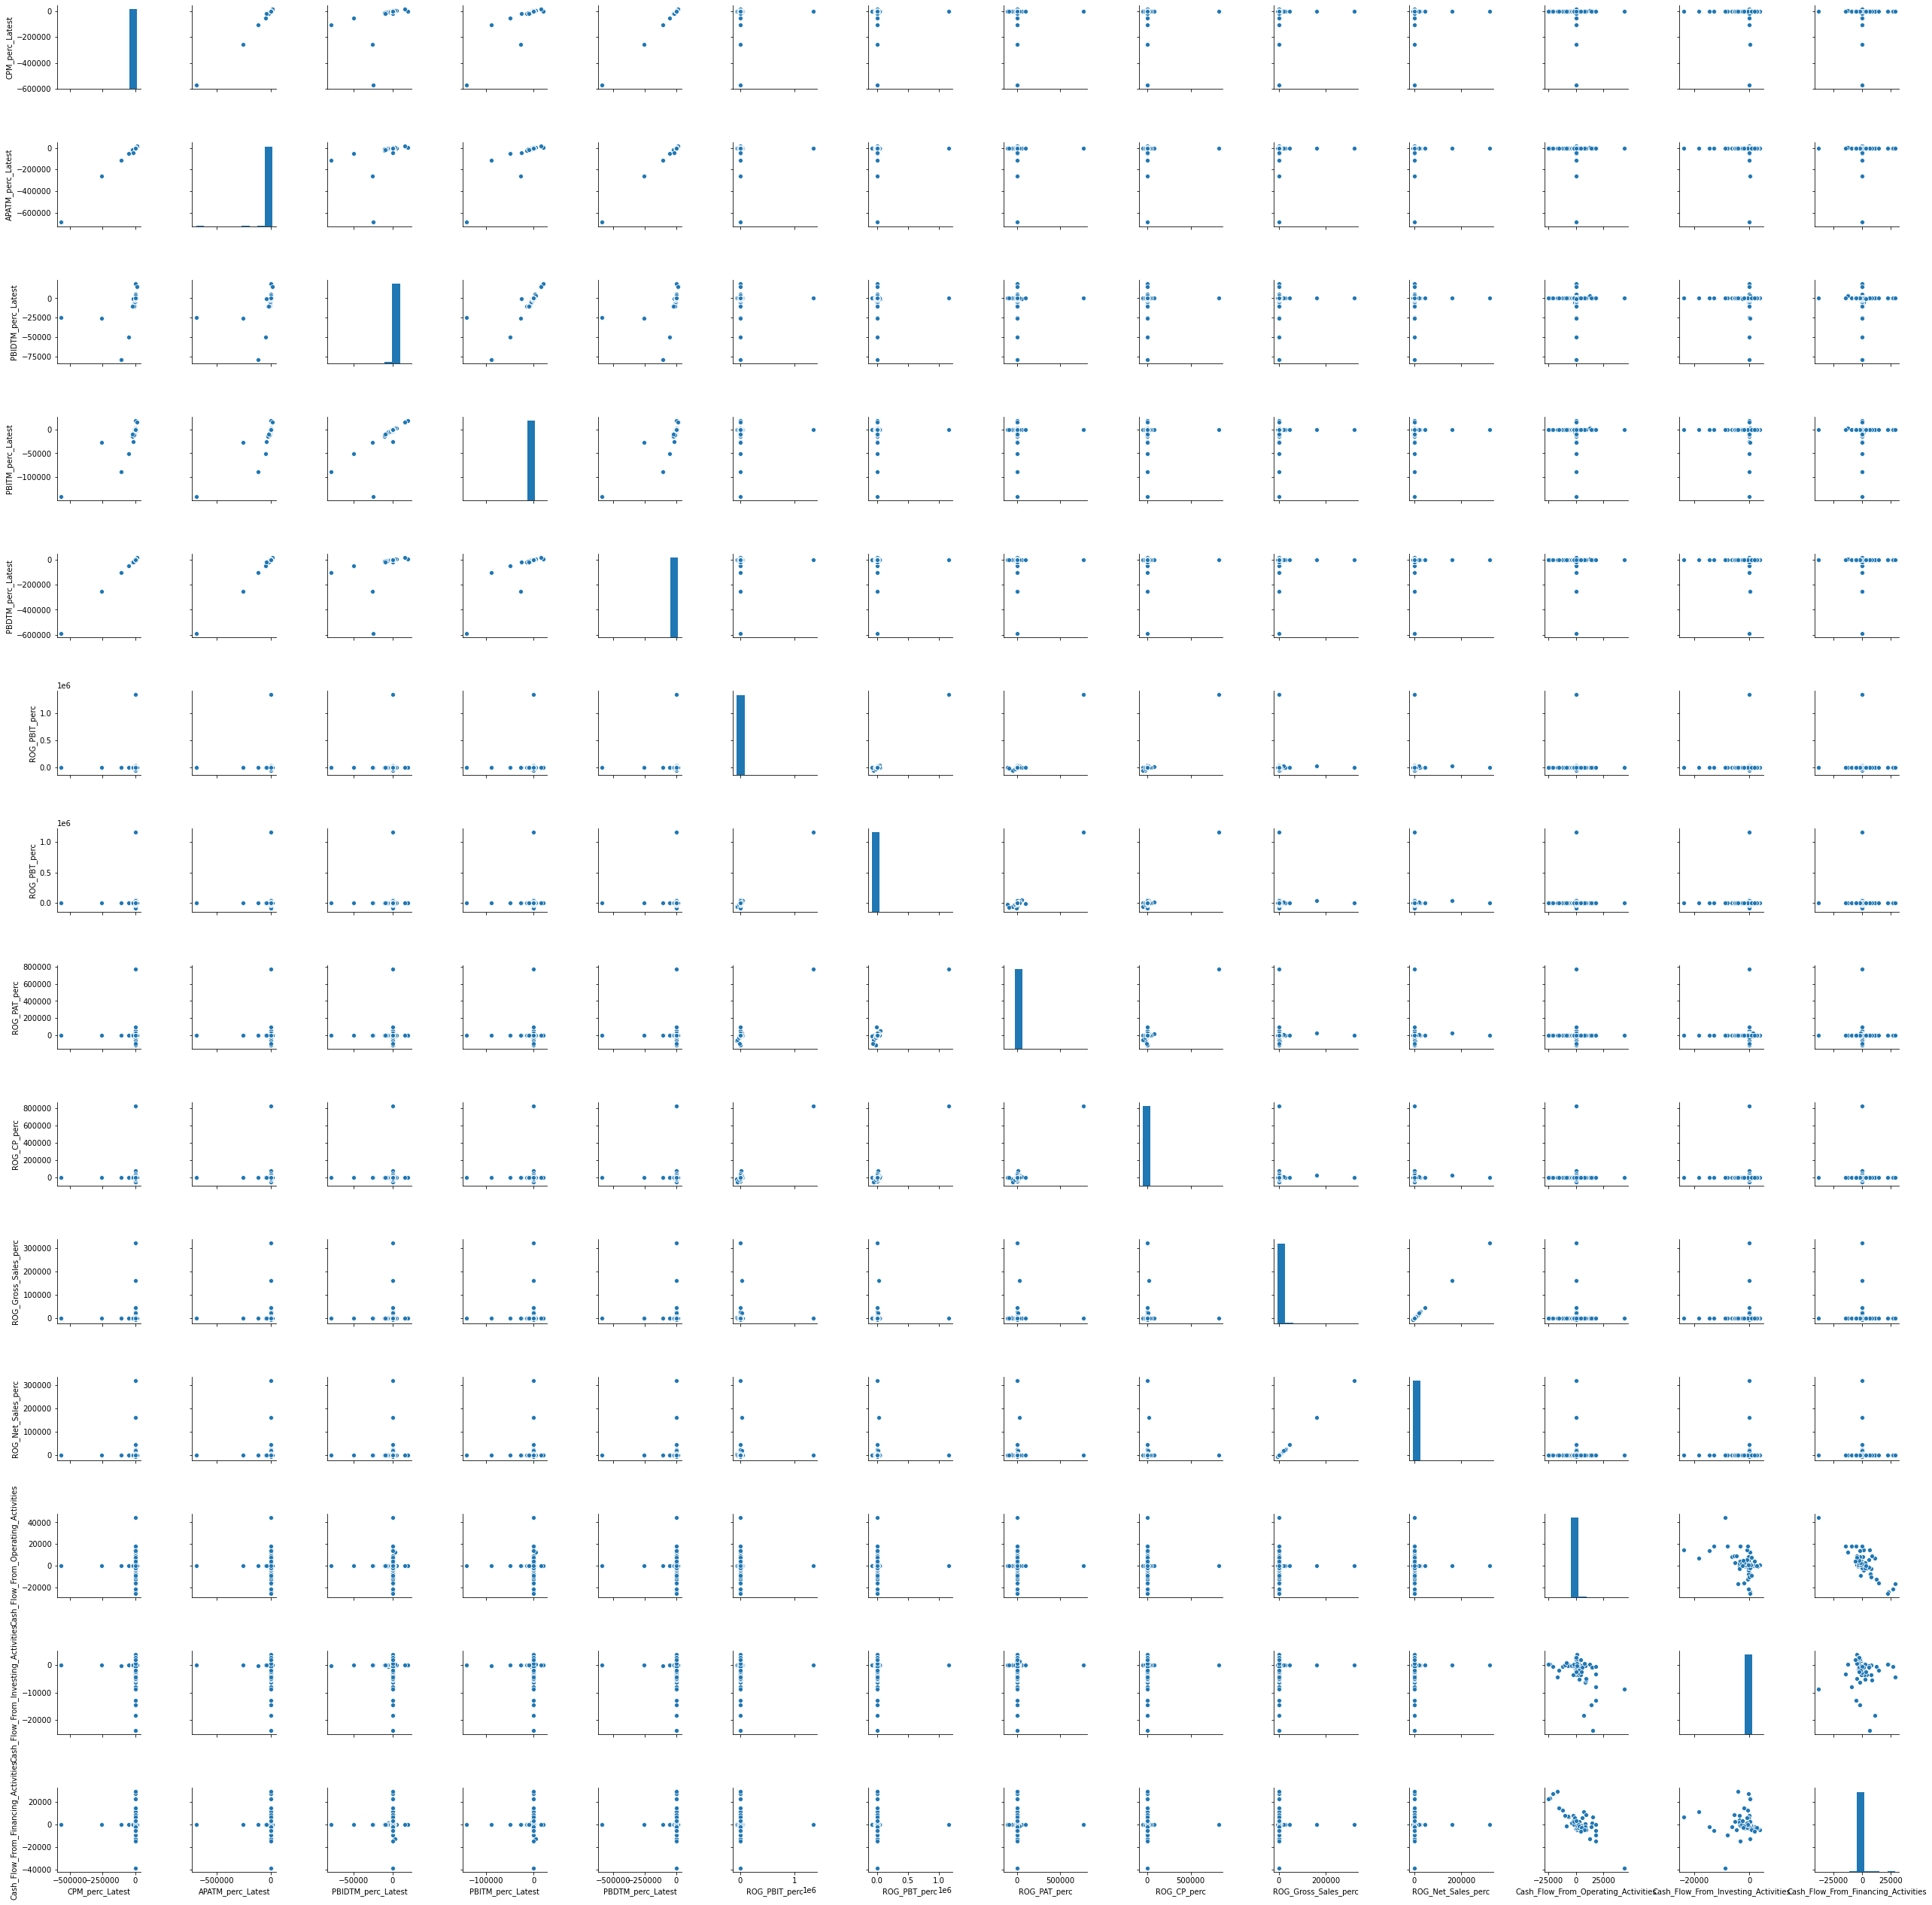

In [31]:
from IPython.display import Image
col= ['CPM_perc_Latest', 'APATM_perc_Latest','PBIDTM_perc_Latest','PBITM_perc_Latest', 'PBDTM_perc_Latest',
'ROG_PBIT_perc', 'ROG_PBT_perc','ROG_PAT_perc', 'ROG_CP_perc',
'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities']

sns_plot = sns.pairplot(df[col])

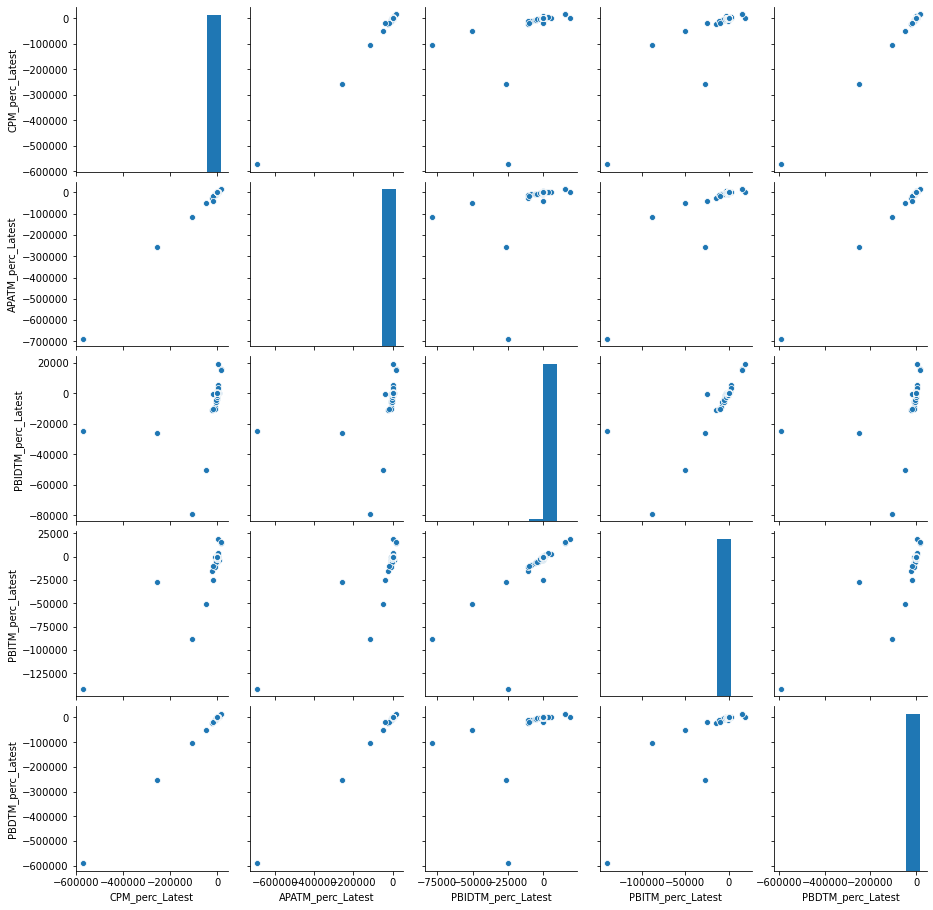

In [32]:
from IPython.display import Image
col= ['CPM_perc_Latest', 'APATM_perc_Latest','PBIDTM_perc_Latest','PBITM_perc_Latest', 'PBDTM_perc_Latest']

sns_plot = sns.pairplot(df[col])

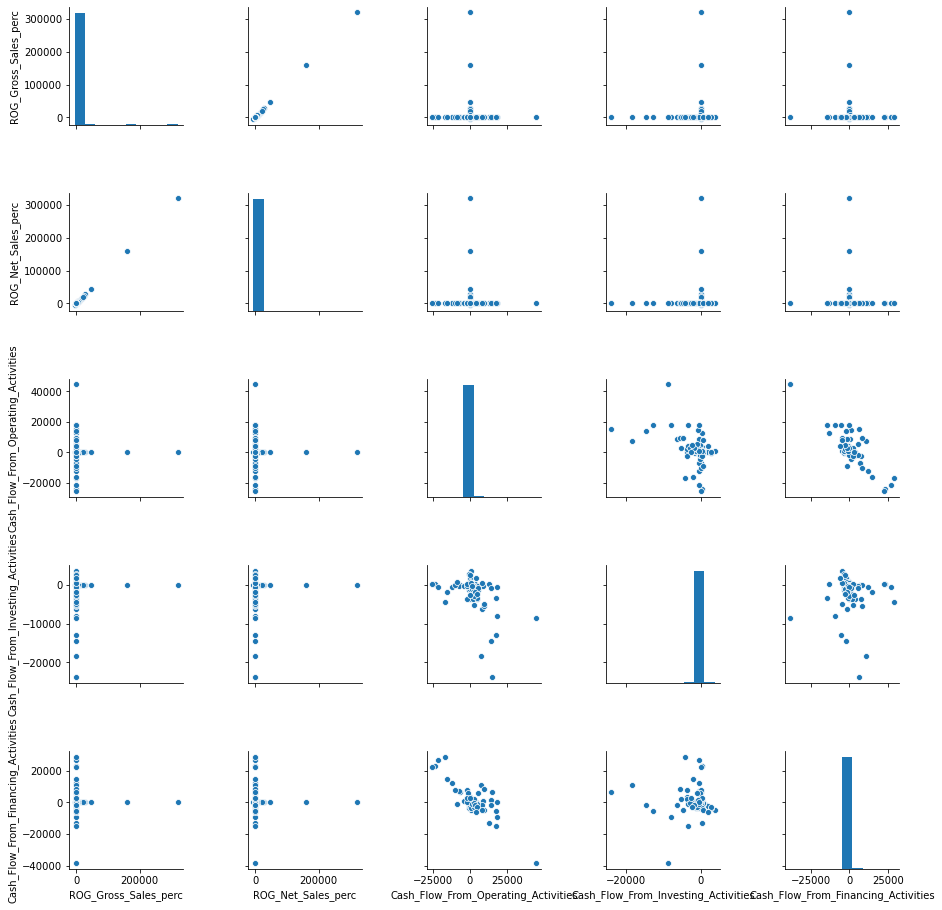

In [33]:
from IPython.display import Image
col= ['ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities']

sns_plot = sns.pairplot(df[col])



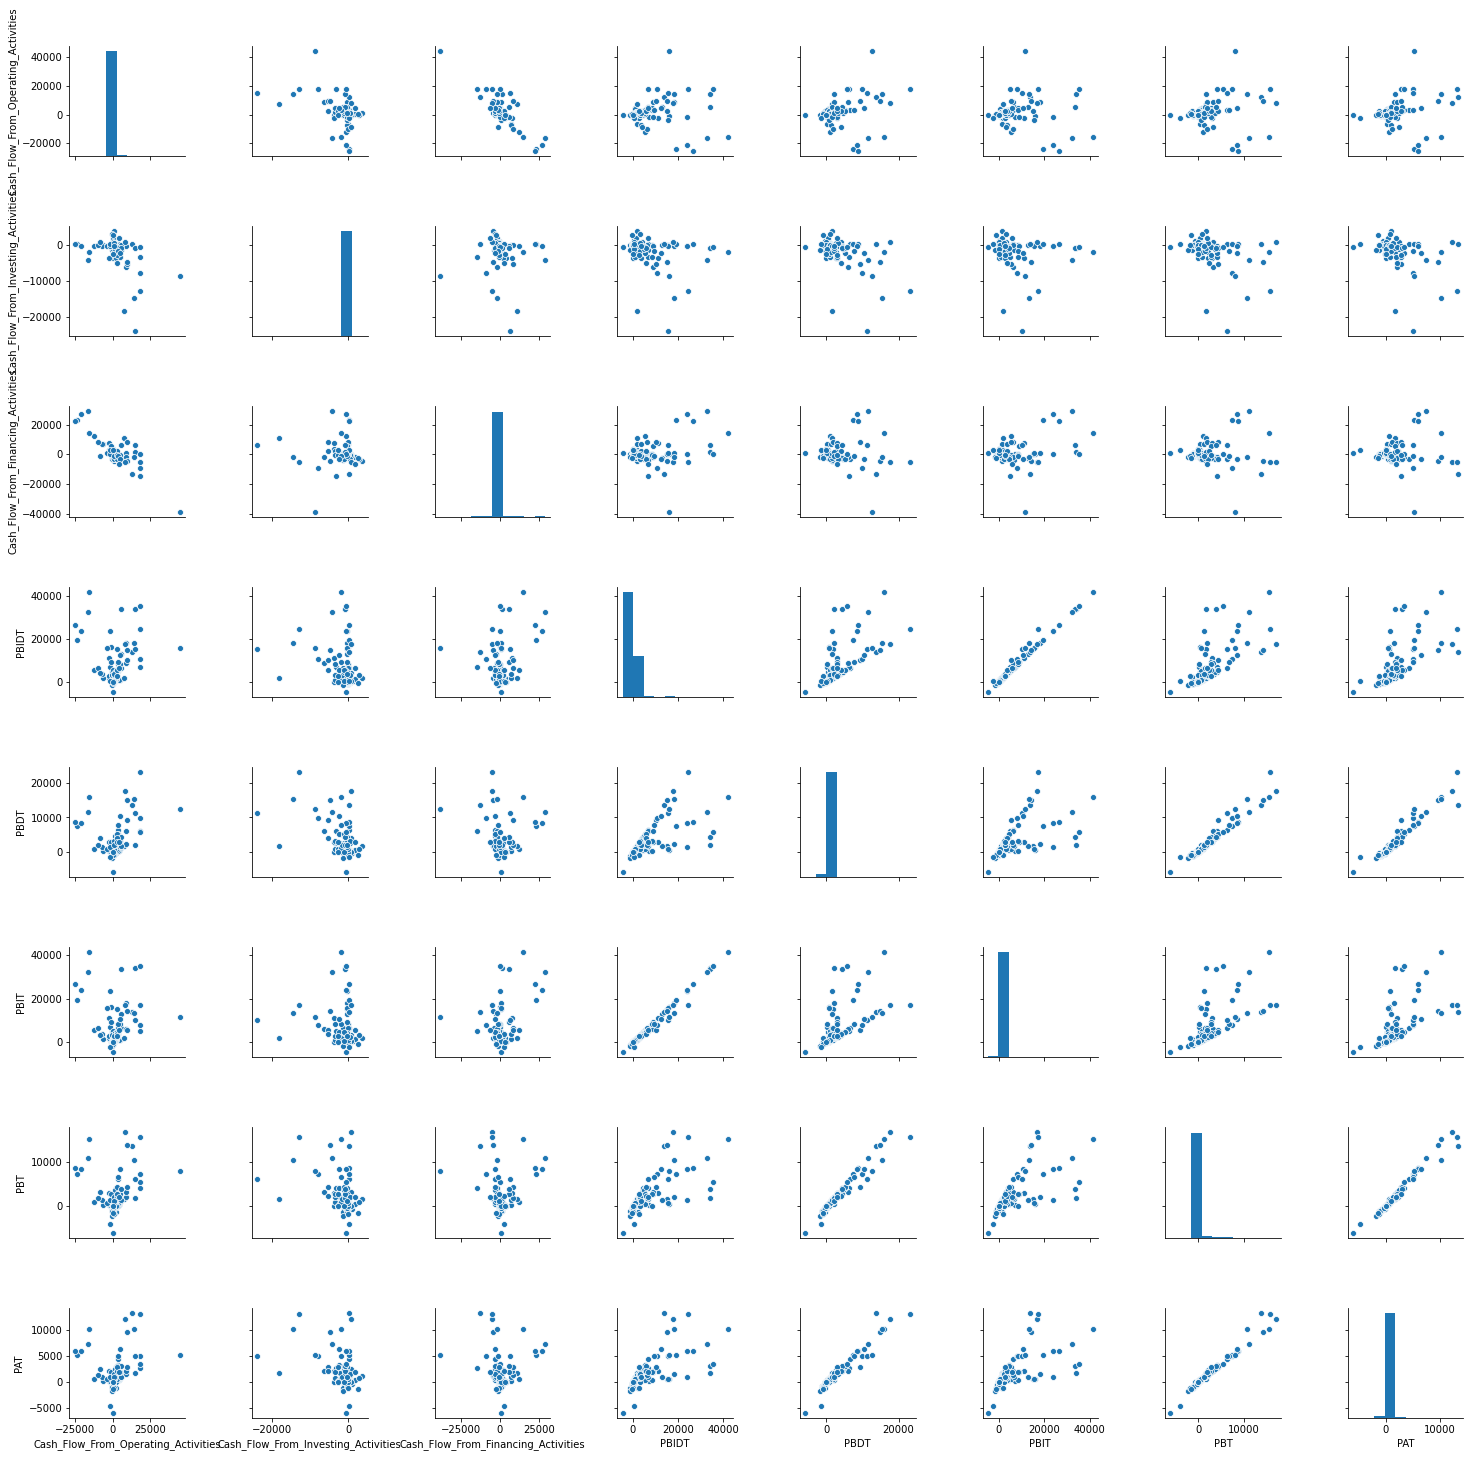

In [34]:
from IPython.display import Image
col= ['Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities','PBIDT', 'PBDT', 'PBIT', 'PBT',
'PAT']

sns_plot = sns.pairplot(df[col])



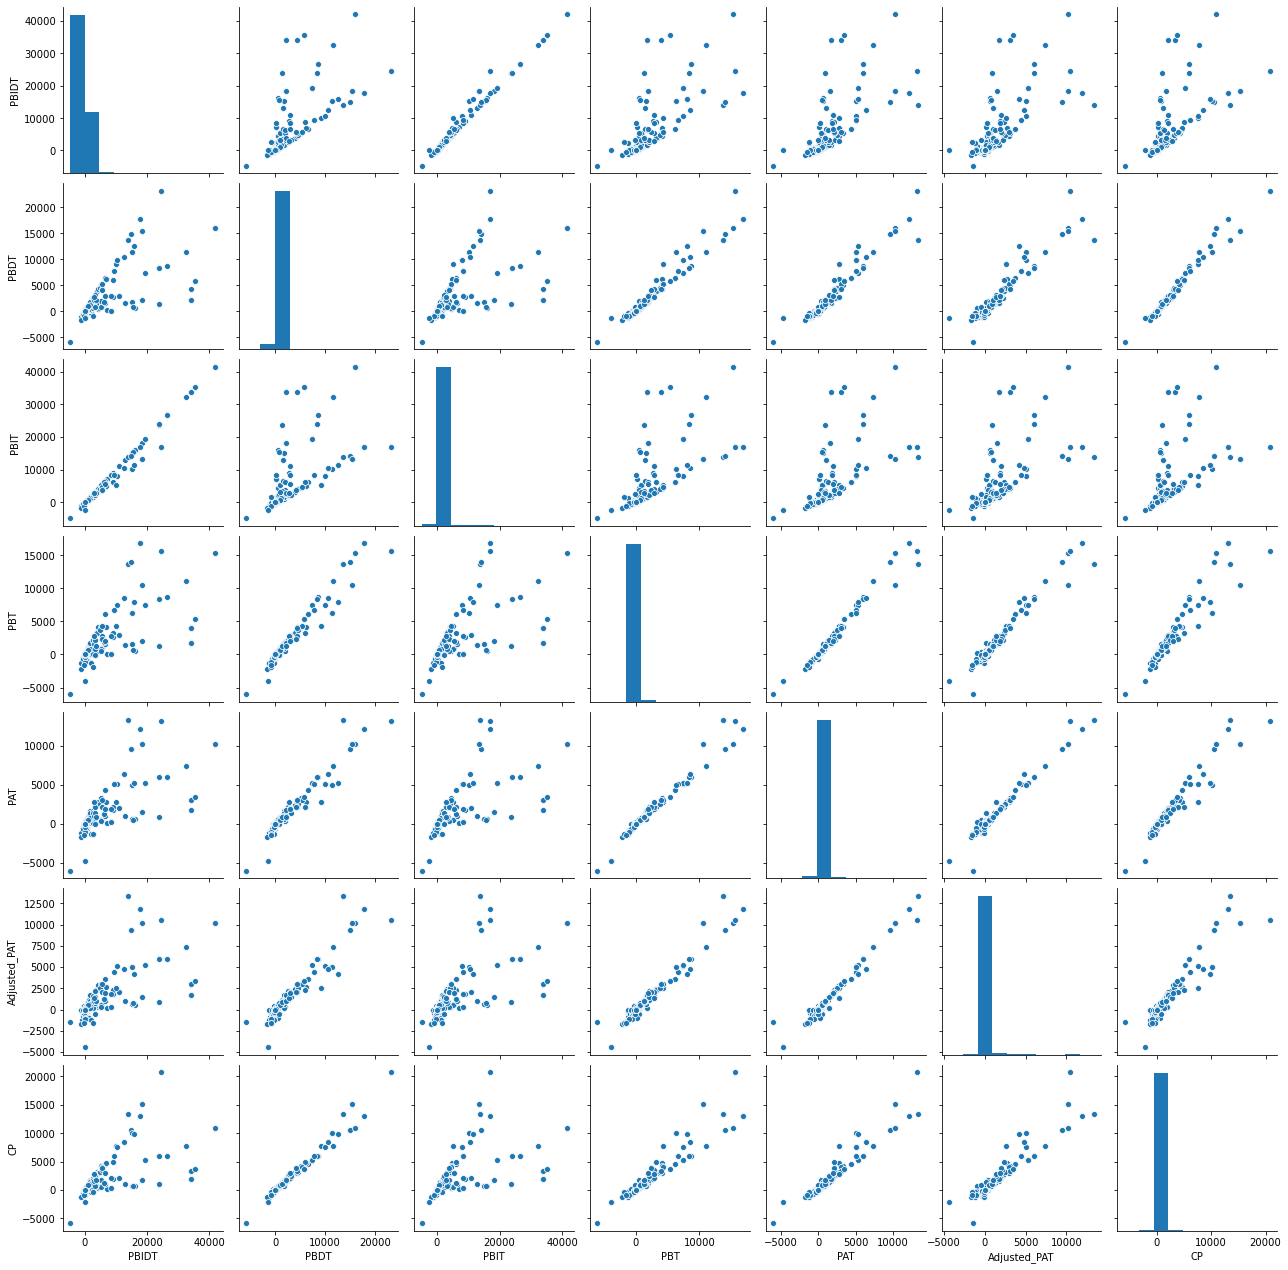

In [35]:
from IPython.display import Image
col= ['PBIDT', 'PBDT', 'PBIT', 'PBT',
'PAT', 'Adjusted_PAT', 'CP']

sns_plot = sns.pairplot(df[col])

In [36]:
df_temp = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
       'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
       'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

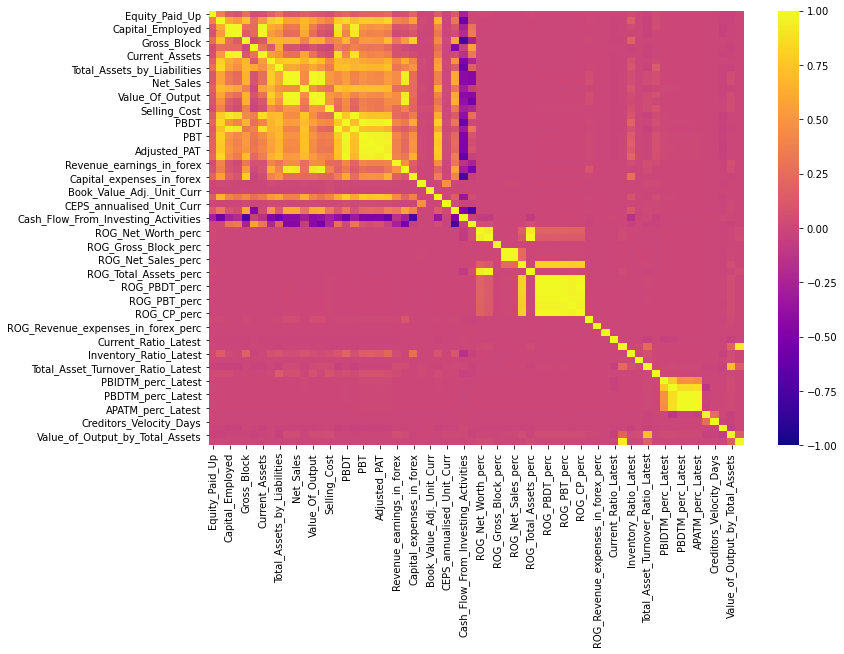

In [37]:
plt.figure(figsize = (12,8))
cor_matrix = df_temp.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [38]:
df_temp_1 = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities']]

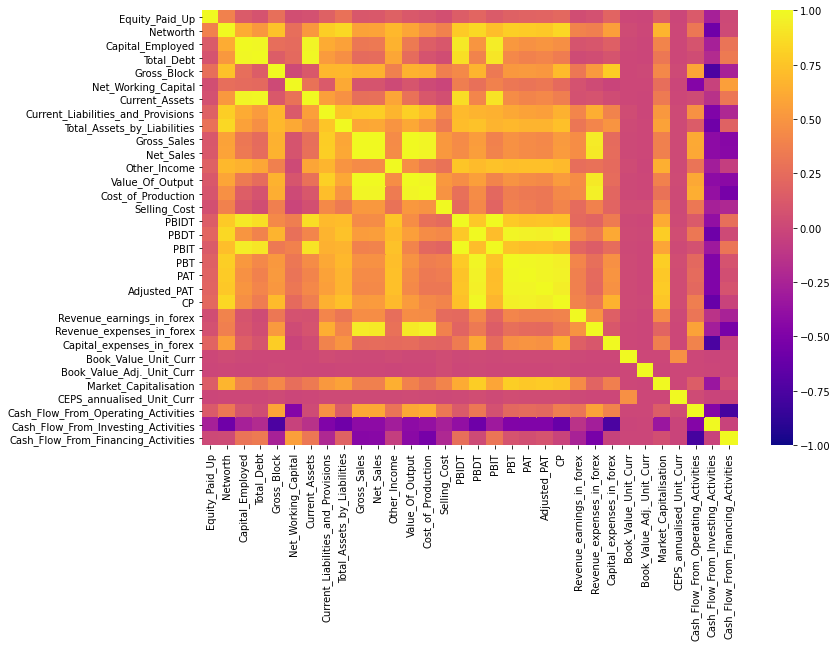

In [39]:
plt.figure(figsize = (12,8))
cor_matrix_1 = df_temp_1.corr()
sns.heatmap(cor_matrix_1, cmap = 'plasma', vmin = -1, vmax= 1)

In [40]:
df_temp_2 = df[['ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc']]

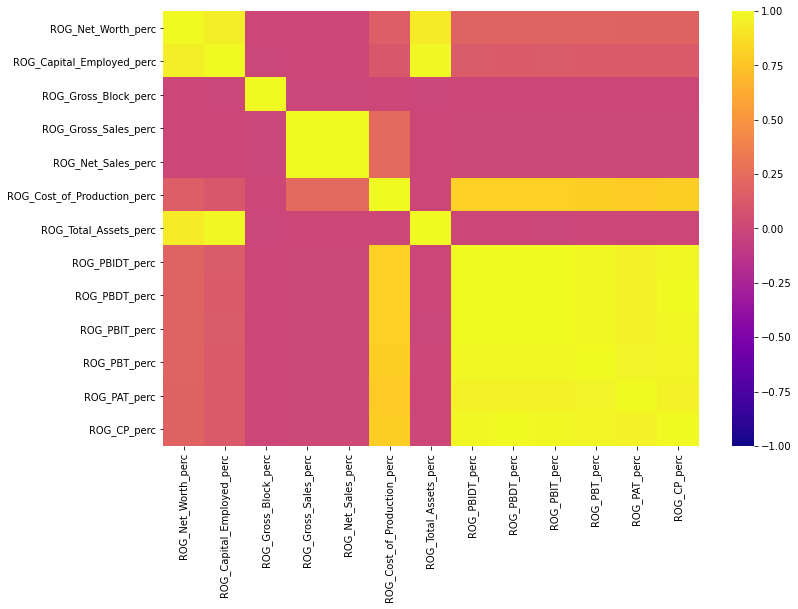

In [41]:
plt.figure(figsize = (12,8))
cor_matrix_2 = df_temp_2.corr()
sns.heatmap(cor_matrix_2, cmap = 'plasma',  vmin = -1, vmax= 1)

In [42]:
df_temp_3 = df[['Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

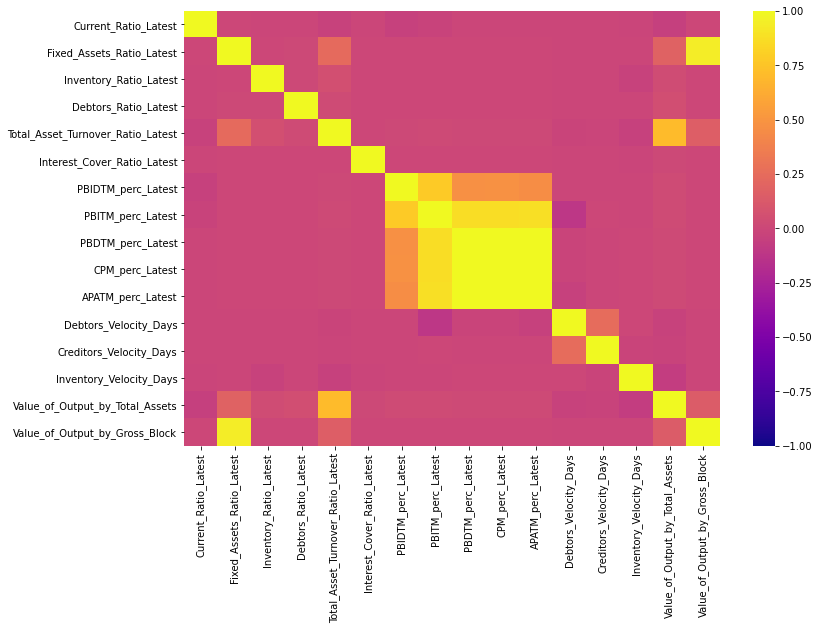

In [43]:
plt.figure(figsize = (12,8))
cor_matrix_3 = df_temp_3.corr()
sns.heatmap(cor_matrix_3, cmap = 'plasma',  vmin = -1, vmax= 1)

### Missing values treatment with median

In [44]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


In [45]:
cols_missing=df.isnull().sum()[df.isnull().sum()>0].index
cols_missing

Index(['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days'],
      dtype='object')

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df[cols_missing].iloc[:,:])

df[cols_missing]=imputer.transform(df[cols_missing])

In [47]:
df.isnull().sum().sum()

0

In [48]:
df[['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days']].isnull().sum()

Book_Value_Adj._Unit_Curr            0
Current_Ratio_Latest                 0
Fixed_Assets_Ratio_Latest            0
Inventory_Ratio_Latest               0
Debtors_Ratio_Latest                 0
Total_Asset_Turnover_Ratio_Latest    0
Interest_Cover_Ratio_Latest          0
PBIDTM_perc_Latest                   0
PBITM_perc_Latest                    0
PBDTM_perc_Latest                    0
CPM_perc_Latest                      0
APATM_perc_Latest                    0
Inventory_Velocity_Days              0
dtype: int64

### Outlier Treatment

In [49]:
df_X = df.drop(['Default',"Co_Code","Co_Name","Networth_Next_Year"], axis = 1)
df_Y = df['Default']

In [50]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [51]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False))

ROG_Revenue_expenses_in_forex_perc     0.450363
ROG_Revenue_earnings_in_forex_perc     0.367262
Cash_Flow_From_Financing_Activities    0.280257
PAT                                    0.267429
Adjusted_PAT                           0.266035
PBT                                    0.262409
APATM_perc_Latest                      0.260457
Cash_Flow_From_Investing_Activities    0.244283
ROG_Gross_Block_perc                   0.231456
CP                                     0.227552
PBDT                                   0.227273
Cash_Flow_From_Operating_Activities    0.223369
ROG_Net_Worth_perc                     0.208310
Revenue_earnings_in_forex              0.205800
Interest_Cover_Ratio_Latest            0.202175
CPM_perc_Latest                        0.200781
PBIT                                   0.200781
PBITM_perc_Latest                      0.200223
PBDTM_perc_Latest                      0.194088
Capital_expenses_in_forex              0.193530
Revenue_expenses_in_forex              0

In [52]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False)).mean()

0.18028008226436135

### Maximum of 45% of the total rows are outliers for a particular variable in the dataset. And the mean numbers of outliers above and below the specified band is around 18%. We are snapping the those outliers to the upper band and lower band respectively.

In [103]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [104]:
for i in df_X:
    df_X[i]=treat_outlier(df_X[i])

0.5 3.75 19.517500000000002 131.24 <built-in function min> <built-in function max>
-11.635624999999997 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.424375 7.602499999999999 226.60500000000002 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.61 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.941249999999998 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425000000000001 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44000000000003 2780.1400000000003 <built-in function min> <built-in function max>
0.0 0.02 3.635 78.80250000000001

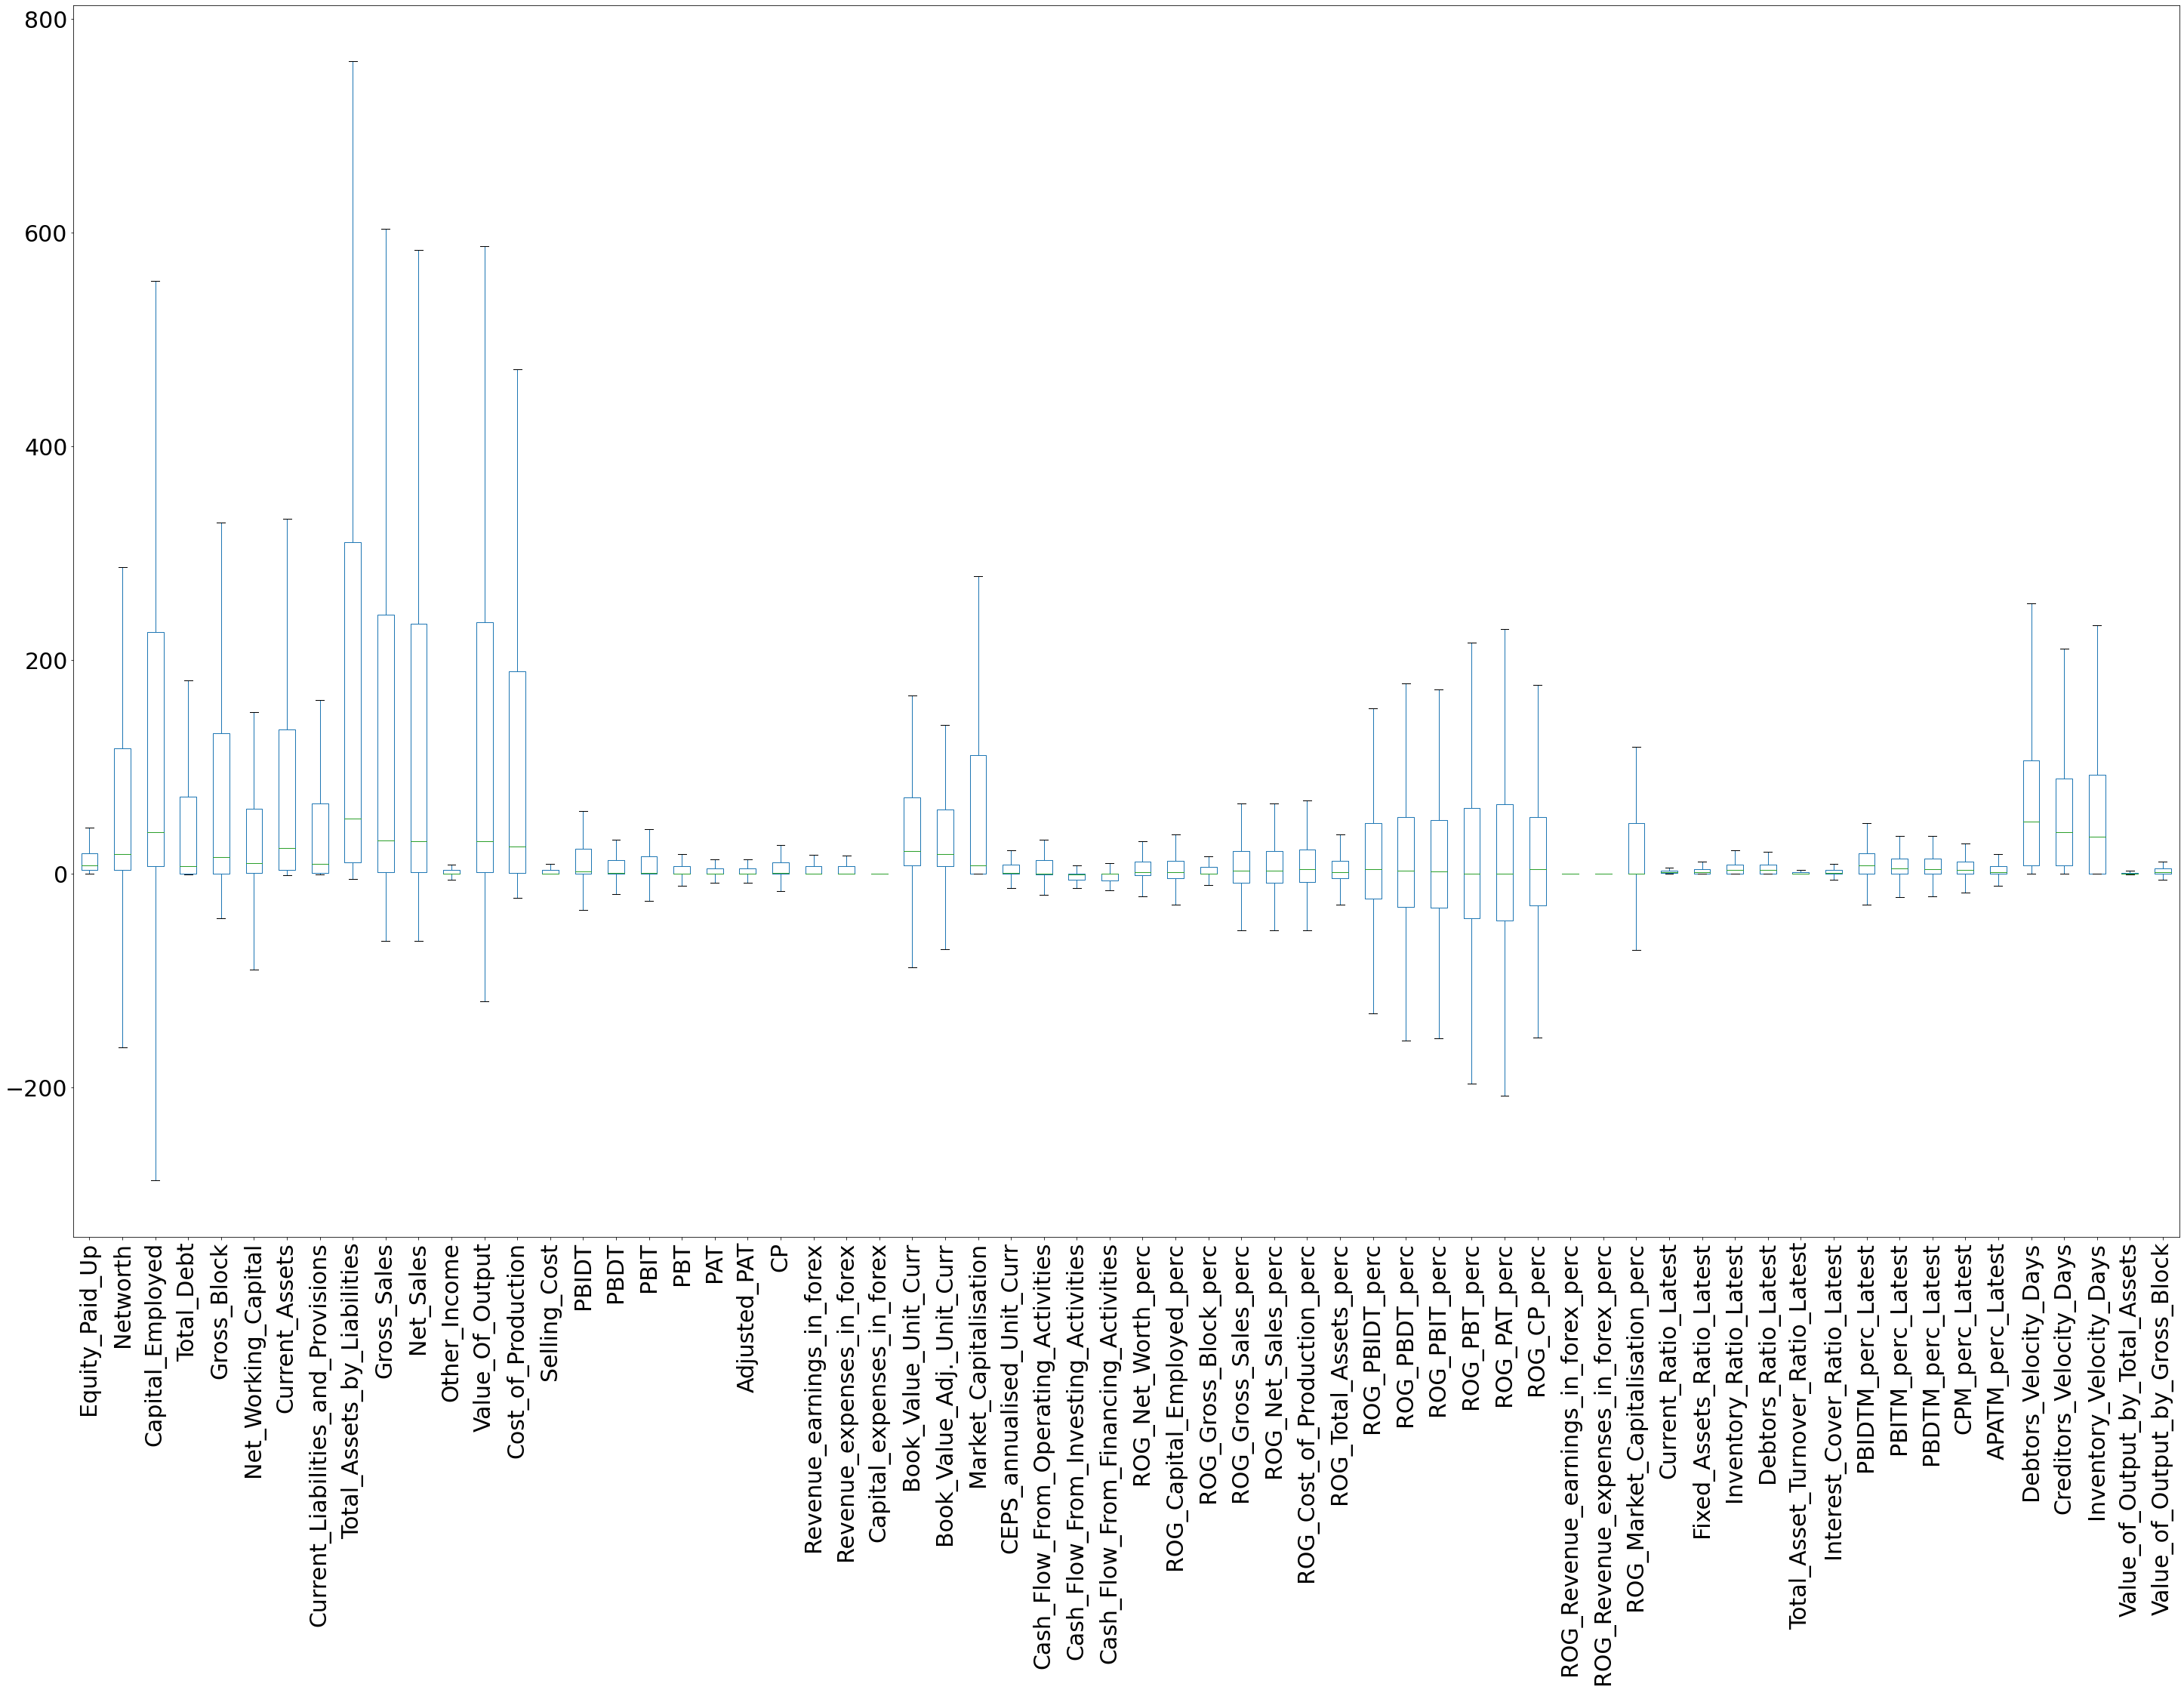

In [105]:
plt.figure(figsize=(50,30))
df_X.boxplot(grid=False, rot=90, fontsize=30)

### All the outliers are treated...

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [56]:
import statsmodels.formula.api as SM


#### Creating train & test datasets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.33,random_state=42,stratify=df['Default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

#df_train.to_csv('df_train.csv',index=False)
#df_test.to_csv('df_test.csv',index=False)

In [58]:
df_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc

In [59]:
print('The number of rows (observations) in TRAIN set is',df_train.shape[0],'\n''The number of columns (variables) in TRAIN set is',df_train.shape[1])

The number of rows (observations) in TRAIN set is 2402 
The number of columns (variables) in TRAIN set is 65


In [60]:
print('The number of rows (observations) in TEST set is',df_test.shape[0],'\n''The number of columns (variables) in TEST set is',df_test.shape[1])

The number of rows (observations) in TEST set is 1184 
The number of columns (variables) in TEST set is 65


## Feature Selection

The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

## Model 1
#### Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

### First of all, variance inflation factor(VIF) is used as criteria to eliminate some of the variables.


In [61]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    return(vif)

In [62]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

variables         VIF
45   ROG_Revenue_earnings_in_forex_perc    1.124533
46   ROG_Revenue_expenses_in_forex_perc    1.200701
34                 ROG_Gross_Block_perc    1.297988
48                 Current_Ratio_Latest    1.367506
47       ROG_Market_Capitalisation_perc    1.517616
60              Creditors_Velocity_Days    1.554967
50               Inventory_Ratio_Latest    1.557235
61              Inventory_Velocity_Days    1.608086
51                 Debtors_Ratio_Latest    1.655111
59                Debtors_Velocity_Days    1.665492
53          Interest_Cover_Ratio_Latest    1.674874
37          ROG_Cost_of_Production_perc    1.907790
32                   ROG_Net_Worth_perc    2.164057
31  Cash_Flow_From_Financing_Activities    2.424072
22            Revenue_earnings_in_forex    2.434017
0                        Equity_Paid_Up    2.547512
24            Capital_expenses_in_forex    2.652227
11                         Other_Income    2.854276
23            Revenue_expenses_in_forex    2.869648
14                         Selling_Cost    3.012508
30  Cash_Flow_From_Investing_Activities    3.018853
27                Market_Capitalisation    3.166142
38                ROG_Total_Assets_perc    3.241266
33            ROG_Capital_Employed_perc    3.465884
3                            Total_Debt    4.005260
28            CEPS_annualised_Unit_Curr    4.052777
29  Cash_Flow_From_Operating_Activities    4.484060
5                   Net_Working_Capital    4.491523
4                           Gross_Block    5.364443
49            Fixed_Assets_Ratio_Latest    5.653077
63       Value_of_Output_by_Gross_Block    5.691700
58                    APATM_perc_Latest    5.938206
26            Book_Value_Adj._Unit_Curr    6.439060
41                        ROG_PBIT_perc    6.468966
7    Current_Liabilities_and_Provisions    6.602700
39                       ROG_PBIDT_perc    7.502699
1                              Networth    7.553956
43                         ROG_PAT_perc    7.714180
25                 Book_Value_Unit_Curr    8.725149
42                         ROG_PBT_perc    8.836809
52    Total_Asset_Turnover_Ratio_Latest    9.208772
44                          ROG_CP_perc    9.209431
62      Value_of_Output_by_Total_Assets   10.353167
54                   PBIDTM_perc_Latest   10.449342
55                    PBITM_perc_Latest   10.925927
6                        Current_Assets   11.174701
40                        ROG_PBDT_perc   11.646504
13                   Cost_of_Production   13.154071
57                      CPM_perc_Latest   13.204234
17                                 PBIT   13.807111
56                    PBDTM_perc_Latest   14.724975
15                                PBIDT   15.019326
2                      Capital_Employed   17.405162
18                                  PBT   18.699369
8           Total_Assets_by_Liabilities   21.655423
20                         Adjusted_PAT   23.124685
21                                   CP   24.138725
16                                 PBDT   25.543620
19                                  PAT   34.127007
9                           Gross_Sales   53.075408
36                   ROG_Net_Sales_perc  120.275129
35                 ROG_Gross_Sales_perc  120.880122
12                      Value_Of_Output  153.181074
10                            Net_Sales  201.667252

#### Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model.

#### Considering only the variabes with VIF less than equal to 5.

In [63]:
f_1 = 'Default ~ ROG_Revenue_earnings_in_forex_perc + ROG_Revenue_expenses_in_forex_perc + ROG_Gross_Block_perc + Current_Ratio_Latest + ROG_Market_Capitalisation_perc + Creditors_Velocity_Days+ Inventory_Ratio_Latest+ Inventory_Velocity_Days+ Debtors_Velocity_Days+ Interest_Cover_Ratio_Latest+ Debtors_Ratio_Latest+ ROG_Cost_of_Production_perc+ ROG_Net_Worth_perc+ Cash_Flow_From_Financing_Activities+ Revenue_earnings_in_forex+ Equity_Paid_Up+ Capital_expenses_in_forex+ Selling_Cost+ Cash_Flow_From_Investing_Activities+ Other_Income+ Revenue_expenses_in_forex+ Market_Capitalisation+ ROG_Total_Assets_perc+ ROG_Capital_Employed_perc+ CEPS_annualised_Unit_Curr+ Total_Debt+ Net_Working_Capital +Cash_Flow_From_Operating_Activities'

#### Fitting the logistic regression model

In [64]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.225997
         Iterations 10


#### Studying whether this equation is significant or not

In [65]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.3408
Time:                        16:36:07   Log-Likelihood:                -542.84
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.507e-100
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.1878      0.146     -8.143      0.000      -1.474      -0.902
ROG_Revenue_earnings_in_forex_perc     -0.0010      0.003     -0.349      0.727      -0.006       0.005
ROG_Revenue_expenses_in_forex_perc     -0.0030      0.002     -1.924      0.054      -0.006    5.59e-05
ROG_Gross_Block_perc                   -0.0107      0.005     -2.206      0.027      -0.020      -0.001
Current_Ratio_Latest                   -0.0634      0.011     -5.753      0.000      -0.085      -0.042
ROG_Market_Capitalisation_perc         -0.0003      0.001     -0.227      0.821      -0.003       0.002
Creditors_Velocity_Days                 0.0012      0.000      3.308      0.001       0.001       0.002
Inventory_Ratio_Latest                 -0.0100      0.006     -1.731      0.084      -0.021       0.001
Inventory_Velocity_Days                -0.0014      0.001     -1.605      0.108      -0.003       0.000
Debtors_Velocity_Days                  -0.0015      0.000     -4.162      0.000      -0.002      -0.001
Interest_Cover_Ratio_Latest            -0.0234      0.010     -2.437      0.015      -0.042      -0.005
Debtors_Ratio_Latest                   -0.0173      0.008     -2.306      0.021      -0.032      -0.003
ROG_Cost_of_Production_perc            -0.0032      0.001     -2.739      0.006      -0.006      -0.001
ROG_Net_Worth_perc                     -0.0167      0.004     -4.519      0.000      -0.024      -0.009
Cash_Flow_From_Financing_Activities     0.0030      0.003      1.078      0.281      -0.002       0.008
Revenue_earnings_in_forex              -0.0010      0.001     -1.012      0.312      -0.003       0.001
Equity_Paid_Up                          0.0031      0.003      1.166      0.244      -0.002       0.008
Capital_expenses_in_forex              -0.0421      0.032     -1.310      0.190      -0.105       0.021
Selling_Cost                           -0.0062      0.006     -1.072      0.284      -0.018       0.005
Cash_Flow_From_Investing_Activities     0.0047      0.003      1.476      0.140      -0.002       0.011
Other_Income                           -0.0054      0.005     -1.118      0.263      -0.015       0.004
Revenue_expenses_in_forex               0.0013      0.001      1.183      0.237      -0.001       0.004
Market_Capitalisation                  -0.0005      0.000     -3.416      0.001      -0.001      -0.000
ROG_Total_Assets_perc                  -0.0119      0.006     -1.846      0.065      -0.024       0.001
ROG_Capital_Employed_perc               0.0010      0.005      0.179      0.858      -0.009       0.011
CEPS_annualised_Unit_Curr              -0.0852      0.022     -3.940      0.000      -0.128      -0.043
Total_Debt                              0.0014      0.000      5.523      0.000       0.001       0.002
Net_Working_Capital                    -0.0023      0.001     -4.146      0.000      -0.003      -0.001
Cash_Flow_From_Op

### We can see that few variables are insignificant & may not be useful to discriminate cases of default. We will try & remove variables whose p value is greater than 0.05 & rebuild our model.

In [66]:
f_2 = 'Default ~  ROG_Gross_Block_perc + Current_Ratio_Latest + Creditors_Velocity_Days + Debtors_Velocity_Days+ Interest_Cover_Ratio_Latest+ Debtors_Ratio_Latest+ ROG_Cost_of_Production_perc+ ROG_Net_Worth_perc+ Market_Capitalisation+  CEPS_annualised_Unit_Curr+ Total_Debt+ Net_Working_Capital'

### Model 2

#### Fitting the logistic regression model

In [67]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.232612
         Iterations 9


#### Studying whether this equation is significant or not

In [68]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.3215
Time:                        16:36:07   Log-Likelihood:                -558.73
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.174e-105
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3895      0.128    -10.813      0.000      -1.641      -1.138
ROG_Gross_Block_perc           -0.0139      0.005     -3.009      0.003      -0.023      -0.005
Current_Ratio_Latest           -0.0602      0.011     -5.471      0.000      -0.082      -0.039
Creditors_Velocity_Days         0.0014      0.000      3.844      0.000       0.001       0.002
Debtors_Velocity_Days          -0.0014      0.000     -3.964      0.000      -0.002      -0.001
Interest_Cover_Ratio_Latest    -0.0267      0.010     -2.713      0.007      -0.046      -0.007
Debtors_Ratio_Latest           -0.0231      0.007     -3.093      0.002      -0.038      -0.008
ROG_Cost_of_Production_perc    -0.0034      0.001     -2.896      0.004      -0.006      -0.001
ROG_Net_Worth_perc             -0.0189      0.003     -5.739      0.000      -0.025      -0.012
Market_Capitalisation          -0.0006      0.000     -4.339      0.000      -0.001      -0.000
CEPS_annualised_Unit_Curr      -0.0991      0.021     -4.761      0.000      -0.140      -0.058
Total_Debt                      0.0010      0.000      5.238      0.000       0.001       0.001
Net_Working_Capital            -0.0024      0.000     -4.722      0.000      -0.003      -0.001
===============================================================================================
"""

In [69]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))


The adjusted pseudo R-square value is 0.3069160598141981


#### Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [70]:
df1= df_train[['ROG_Gross_Block_perc','Current_Ratio_Latest','Creditors_Velocity_Days','Debtors_Velocity_Days','Interest_Cover_Ratio_Latest','Debtors_Ratio_Latest','ROG_Cost_of_Production_perc','ROG_Net_Worth_perc','Market_Capitalisation','CEPS_annualised_Unit_Curr','Total_Debt','Net_Working_Capital']]

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_1(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables_1"] = df1.columns
    vif["VIF_new"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

In [72]:
calc_vif_1(df1).sort_values(by='VIF_new', ascending = True)

variables_1   VIF_new
6   ROG_Cost_of_Production_perc  1.129014
1          Current_Ratio_Latest  1.159444
0          ROG_Gross_Block_perc  1.175504
7            ROG_Net_Worth_perc  1.262193
5          Debtors_Ratio_Latest  1.277087
4   Interest_Cover_Ratio_Latest  1.435159
2       Creditors_Velocity_Days  1.456320
3         Debtors_Velocity_Days  1.496792
9     CEPS_annualised_Unit_Curr  1.621593
8         Market_Capitalisation  1.950350
10                   Total_Debt  2.273712
11          Net_Working_Capital  2.442888

#### We can see that multicollinearity still exists but we will keep those variables as VIFs are not very high (<5).

## Prediction on the Data

#### Checking the predicted probability values.

In [73]:
y_prob_pred_train = model_2.predict(df_train)
y_prob_pred_train

842     0.021232
1057    0.001427
1595    0.008083
100     0.199408
1191    0.079213
          ...   
1815    0.015979
2852    0.203313
1505    0.004057
375     0.542443
3428    0.000477
Length: 2402, dtype: float64

#### Checking predicted classes with 0.5 probability cut-off

In [74]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

## Model Evaluation on the Training Data

#### Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

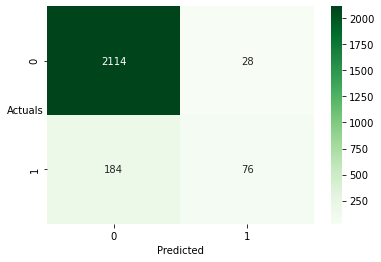

In [75]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [76]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.920     0.987     0.952      2142
           1      0.731     0.292     0.418       260

    accuracy                          0.912      2402
   macro avg      0.825     0.640     0.685      2402
weighted avg      0.899     0.912     0.894      2402



#### Overall 91% of correct predictions to total predictions were made by the model.

#### 29% of those defaulted were correctly identified as defaulters by the model, which is not so good number. 

### We will change the probability cut-offs and check if our predictions have improved.

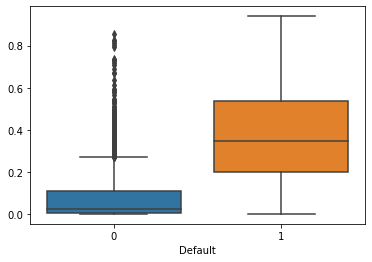

In [77]:
sns.boxplot(x=df_train['Default'],y=y_prob_pred_train)
plt.xlabel('Default');

#### From the above boxplot, we can decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

### Let us take a cut-off of 0.07 and check our predictions

In [78]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

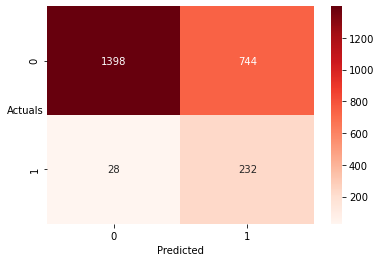

In [79]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [80]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.653     0.784      2142
           1      0.238     0.892     0.375       260

    accuracy                          0.679      2402
   macro avg      0.609     0.772     0.580      2402
weighted avg      0.900     0.679     0.739      2402



### Accuracy of the model i.e. %overall correct predictions has decreased from 91% to 68% but sensitivity of the model has increased from 29% to 89%, which is good for our prediction. But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.08 and check our predictions


In [81]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

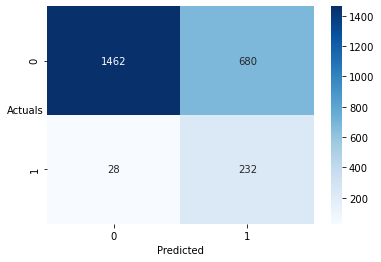

In [82]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [83]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.981     0.683     0.805      2142
           1      0.254     0.892     0.396       260

    accuracy                          0.705      2402
   macro avg      0.618     0.787     0.600      2402
weighted avg      0.903     0.705     0.761      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 68% to 71% but sensitivity of the model has not changed (89%), which is good for our prediction. But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.09 and check our predictions

In [84]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

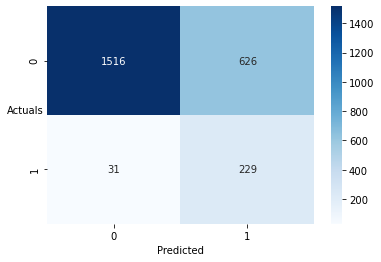

In [85]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [86]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.708     0.822      2142
           1      0.268     0.881     0.411       260

    accuracy                          0.726      2402
   macro avg      0.624     0.794     0.616      2402
weighted avg      0.903     0.726     0.777      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 71% to 73% but sensitivity of the model has decresed from 89% to 88%. But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.10 and check our predictions

In [87]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.1:
        a=1
    else:
        a=0
    y_class_pred.append(a)

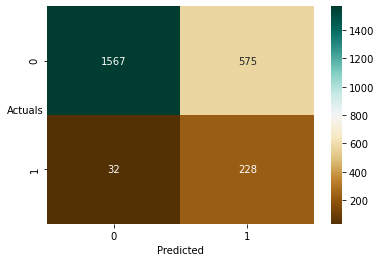

In [88]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [89]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.732     0.838      2142
           1      0.284     0.877     0.429       260

    accuracy                          0.747      2402
   macro avg      0.632     0.804     0.633      2402
weighted avg      0.905     0.747     0.793      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 73% to 75% but sensitivity of the model has notdecresed (88%). But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.115 and check our predictions

In [90]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.115:
        a=1
    else:
        a=0
    y_class_pred.append(a)

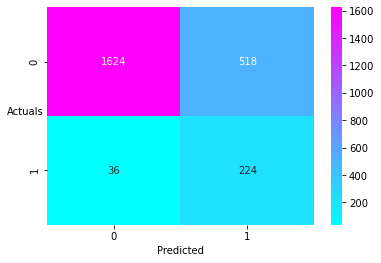

In [91]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='cool');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [92]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.978     0.758     0.854      2142
           1      0.302     0.862     0.447       260

    accuracy                          0.769      2402
   macro avg      0.640     0.810     0.651      2402
weighted avg      0.905     0.769     0.810      2402



### AUC and ROC for Training data

Area under Curve (AUC) is: 0.888


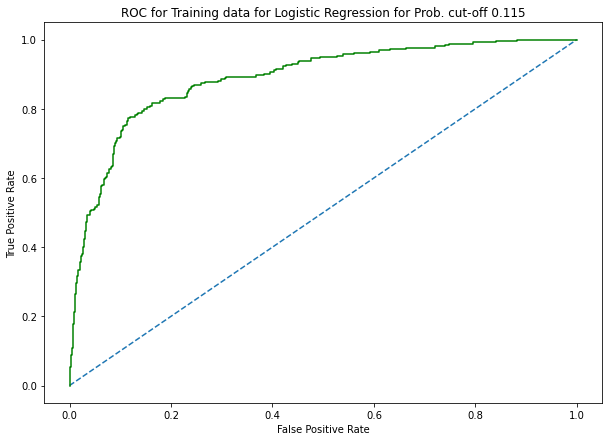

In [98]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(df_train['Default'], y_prob_pred_train)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(df_train['Default'], y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for Logistic Regression for Prob. cut-off 0.115')
plt.show()

### Accuracy of the model i.e. %overall correct predictions has increased from 75% to 77% but sensitivity of the model has decreased slightly from 88% to 86%.

### We will keep this model for further analysis as we are trying to maintain a balance between Accuracy and Recall..

## Model Evaluation on the Test Data

In [93]:
y_prob_pred_test = model_2.predict(df_test)
y_prob_pred_test

251     0.312858
3493    0.000015
3063    0.213548
2384    0.221052
1679    0.003341
          ...   
1321    0.068640
2666    0.017412
773     0.007915
3488    0.000423
2956    0.000059
Length: 1184, dtype: float64

In [94]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.115:
        a=1
    else:
        a=0
    y_class_pred.append(a)

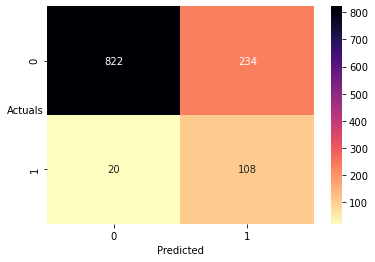

In [95]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='magma_r');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [96]:
print(metrics.classification_report(df_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.976     0.778     0.866      1056
           1      0.316     0.844     0.460       128

    accuracy                          0.785      1184
   macro avg      0.646     0.811     0.663      1184
weighted avg      0.905     0.785     0.822      1184



Area under Curve (AUC) is: 0.877


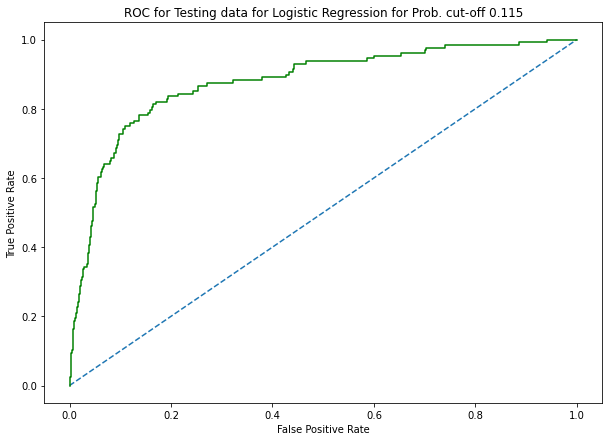

In [101]:
#from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_test_auc = roc_auc_score(df_test['Default'], y_prob_pred_test)
print('Area under Curve (AUC) is: %.3f' % LOG_test_auc)
# calculate roc curve
LOG_test_fpr, LOG_test_tpr, LOG_test_thresholds = roc_curve(df_test['Default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_test_fpr, LOG_test_tpr,color='green')
plt.title('ROC for Testing data for Logistic Regression for Prob. cut-off 0.115')
plt.show()

### Accuracy of the model i.e. %overall correct prediction is 78% and sensitivity of the model is 84%. 

## So, model performs well with both train and test set.